#   Ecommerce Capstone project (Eleckart)

<b> Eleckart is a leading ecommerce chain based in canada which follows marketplace model. The brand has shown commendable growth in last few years, however last one year, Eleckart has faced dip even after spending significant amount of money on marketing and promotions. Understanding the problem and making recommendations about how eleckart end-end operations can be optimised. lets solve the problem statement 

In [132]:
# lets import the necessary libraries which are required 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [133]:
## handling the warnings 

import warnings
warnings.filterwarnings("ignore")

In [134]:
## lets start importing the main file that is customer electronics csv file

cust_elec_df = pd.read_csv("ConsumerElectronics.csv")

cust_elec_df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [135]:
cust_elec_df.isnull().sum()

fsn_id                             0
order_date                         0
Year                               0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
deliverybdays                      0
deliverycdays                      0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
dtype: int64

In [136]:
## these are the unique fsn id 

len(cust_elec_df.fsn_id.unique())

21219

In [137]:
## checking the shape of the dataset 

cust_elec_df.shape

print(f"there are {cust_elec_df.shape[0]} rows and {cust_elec_df.shape[1]} columns")

there are 1648824 rows and 20 columns


In [138]:
## now lets begin with fixing the mssing values , as we have already checked that there is no missing values, actually the row with /n are mssing values 

cust_elec_df = pd.read_csv("ConsumerElectronics.csv", na_values=['\\N', ' '])

cust_elec_df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,NaN,NaN,COD,5,-1.012991e+18,-7.791756e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,NaN,NaN,COD,7,-8.990325e+18,7.335411e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,NaN,NaN,COD,10,-1.040443e+18,-7.477688e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,NaN,NaN,Prepaid,4,-7.604961e+18,-5.835932e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,NaN,NaN,Prepaid,6,2.894557e+18,5.347354e+17,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [139]:
cust_elec_df.isnull().sum()

fsn_id                                   0
order_date                               0
Year                                     0
Month                                    0
order_id                                 0
order_item_id                            0
gmv                                   4904
units                                    0
deliverybdays                      1312972
deliverycdays                      1312971
s1_fact.order_payment_type               0
sla                                      0
cust_id                               4904
pincode                               4904
product_analytic_super_category          0
product_analytic_category                0
product_analytic_sub_category            0
product_analytic_vertical             5828
product_mrp                              0
product_procurement_sla                  0
dtype: int64

In [140]:
cust_elec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1643920 non-null  float64
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    335852 non-null   float64
 9   deliverycdays                    335853 non-null   float64
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [141]:
cust_elec_df.shape

(1648824, 20)

In [142]:
## the columns deliverybdays and deliverycdays has the maximum null values almost 79.63% 

missing_percent = []

for i in cust_elec_df.columns:
    percent_missing = round(cust_elec_df[i].isnull().sum()/cust_elec_df.shape[0] * 100,2)
    
    missing_percent.append(percent_missing)
    
print(missing_percent)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 79.63, 79.63, 0.0, 0.0, 0.3, 0.3, 0.0, 0.0, 0.0, 0.35, 0.0, 0.0]


In [143]:
#Let's remove the columns deliverybdays & deliverycdays as there are 79% null values

cust_elec_df.drop(['deliverybdays', 'deliverycdays'], axis = 1, inplace = True)

In [144]:
cust_elec_df.shape

(1648824, 18)

In [145]:
# percentage of unique orders belonging to the required 3 categories

print("Percentage of unique orders for the 3 categories:",
      len(cust_elec_df.loc[(cust_elec_df['product_analytic_sub_category']=='GamingAccessory') | 
                 (cust_elec_df['product_analytic_sub_category']=='CameraAccessory') | 
                 (cust_elec_df['product_analytic_sub_category']=='HomeAudio')].drop_duplicates
          (subset = ["order_id"], keep = False))/len(cust_elec_df.loc[((cust_elec_df['product_analytic_sub_category']=='GamingAccessory') | 
                                                             (cust_elec_df['product_analytic_sub_category']=='CameraAccessory') | 
                                                             (cust_elec_df['product_analytic_sub_category']=='HomeAudio'))])*100)

Percentage of unique orders for the 3 categories: 81.95886392814697


In [146]:
## dropping the duplicates

cust_elec_df = cust_elec_df.drop_duplicates(subset=["order_date", "order_id", "order_item_id" ,"units"], keep = 'first', inplace = False)

In [147]:
cust_elec_df.shape

(1536296, 18)

In [148]:
## change the formatting of the columns 

cust_elec_df['order_datetime'] = pd.to_datetime(cust_elec_df['order_date'], format='%Y-%m-%d %H:%M:%S')


In [149]:
cust_elec_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1536296 entries, 0 to 1543996
Data columns (total 19 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   fsn_id                           1536296 non-null  object        
 1   order_date                       1536296 non-null  object        
 2   Year                             1536296 non-null  int64         
 3   Month                            1536296 non-null  int64         
 4   order_id                         1536296 non-null  float64       
 5   order_item_id                    1536296 non-null  float64       
 6   gmv                              1532278 non-null  float64       
 7   units                            1536296 non-null  int64         
 8   s1_fact.order_payment_type       1536296 non-null  object        
 9   sla                              1536296 non-null  int64         
 10  cust_id                       

In [150]:
cust_elec_df['order_id']=  cust_elec_df['order_id'].apply(lambda x: '{:.0f}'.format(x))
cust_elec_df['order_item_id']=  cust_elec_df['order_item_id'].apply(lambda x: '{:.0f}'.format(x))
cust_elec_df['pincode']=  cust_elec_df['pincode'].apply(lambda x: '{:.0f}'.format(x)) 

In [151]:
cust_elec_df['cust_id']=  cust_elec_df['cust_id'].astype("float64")

In [152]:
cust_elec_df['cust_id']=  cust_elec_df['cust_id'].apply(lambda x: '{:.0f}'.format(x))

In [153]:
## extracting the date 

cust_elec_df['order_date'] = cust_elec_df['order_datetime'].dt.date

In [154]:
##  mentioned to only use the data from date range - July 2015 to June 2016, filtering out the other date

st_date = pd.to_datetime("2015-07-01").date()
ed_date = pd.to_datetime("2016-06-30").date()
cust_elec_df = cust_elec_df[(cust_elec_df['order_date']>=st_date) 
                                                      & (cust_elec_df['order_date']<=ed_date)]

In [155]:
## feature engneering extracting the week info,

cust_elec_df['order_week'] = cust_elec_df['order_datetime'].dt.week



In [156]:
## product_analytic_vertical has some mssing values ,thus droppping the rows 

cust_elec_df = cust_elec_df[~cust_elec_df['product_analytic_vertical'].isnull()]

In [157]:
## same with gmv 

cust_elec_df = cust_elec_df[~cust_elec_df['gmv'].isnull()]

In [158]:
## so all the null values are fixed 

cust_elec_df.isnull().sum()

fsn_id                             0
order_date                         0
Year                               0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
order_datetime                     0
order_week                         0
dtype: int64

In [159]:
# product mrp is 0 and drop the same as it makes no sense to keep it as is serves no purpose 

len(cust_elec_df[cust_elec_df.product_mrp == 0])

print(" the mrp 0 rows totals are {}".format(len(cust_elec_df[cust_elec_df.product_mrp == 0])))

 the mrp 0 rows totals are 4864


In [160]:
cust_elec_df = cust_elec_df[~(cust_elec_df["product_mrp"] == 0)]

In [161]:
cust_elec_df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,3419300926147000,3419300926147000,6400.0,1,COD,5,-1012991307785880064,-7791755829057349632,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17 15:11:54,42
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,1420830839915200,1420830839915200,6900.0,1,COD,7,-8990324579055120384,7335411490974310400,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19 10:07:22,43
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,2421912925714800,2421912925714800,1990.0,1,COD,10,-1040442942046599936,-7477687762286570496,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,43
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,4416592101738400,4416592101738400,1690.0,1,Prepaid,4,-7604960843527140352,-5835931638776609792,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,42
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,4419525153426400,4419525153426400,1618.0,1,Prepaid,6,2894557208345299968,534735360997241984,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,42


In [162]:
# let's check if gmv is 0 and drop the same for the following reasons 


len(cust_elec_df.loc[cust_elec_df.gmv == 0])

940

In [163]:
## drop the rows 

cust_elec_df = cust_elec_df[~(cust_elec_df.gmv == 0)]

In [164]:
#  GMV greater than or equal to the MRP x Number of units sold and drop them

cust_elec_df.loc[cust_elec_df.gmv > (cust_elec_df.product_mrp * cust_elec_df.units)]

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week
511,ACCCX3SGJRUGH99Z,2015-10-06,2015,10,4409414274572400,4409414274572400,38839.0,1,Prepaid,6,-1617884985499729920,-5488422414876180480,CE,CameraAccessory,CameraAccessory,Lens,34980,0,2015-10-06 04:41:01,41
512,ACCCX3SGN4BGZGQY,2015-10-16,2015,10,2417955407141700,2417955407141700,30155.0,1,Prepaid,4,7810252194098679808,-3845369806734649856,CE,CameraAccessory,CameraAccessory,Lens,24696,1,2015-10-16 05:36:04,42
818,ACCCX3SUBDTT3GMA,2015-10-08,2015,10,1411811239304700,1411811239304700,450.0,1,COD,7,1094225417257330048,-4625296276251990016,CE,CameraAccessory,CameraAccessory,Lens,405,0,2015-10-08 23:12:54,41
819,ACCCX3SUBDTT3GMA,2015-10-22,2015,10,4423484217011800,4423484217011800,900.0,2,Prepaid,8,6138352773202599936,-6222871012507570176,CE,CameraAccessory,CameraAccessory,Lens,405,0,2015-10-22 11:23:26,43
820,ACCCX3SUBXAF4QRK,2015-10-07,2015,10,1410601049371400,1410601049371400,380.0,1,COD,5,-8616460973717909504,1948276093461929984,CE,CameraAccessory,CameraAccessory,Lens,285,-1,2015-10-07 13:31:33,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543909,VPLEAFCSDSGDN3MQ,2015-09-26,2015,9,3401056309287700,3401056309287700,2090.0,1,COD,9,1223067848602500096,-4064396209165700096,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,1990,5,2015-09-26 12:25:44,39
1543910,VPLEAFCSDSGDN3MQ,2015-09-30,2015,9,3404733643285700,3404733643285700,2090.0,1,COD,5,-5351940551013839872,-1947801225867869952,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,1990,5,2015-09-30 18:33:06,40
1543911,VPLEAFCSDSGDN3MQ,2015-09-01,2015,9,2378842904697260,2378842904749150,2090.0,1,COD,4,958094493904413952,3186507829414430208,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,1990,5,2015-09-01 22:03:47,36
1543912,VPLEAFCSDSGDN3MQ,2015-09-20,2015,9,3395898721883800,3395898721883800,2090.0,1,COD,6,1636911729380720128,-6698071009621180416,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,1990,5,2015-09-20 13:08:17,38


In [165]:
## GMV is greater than the number of units sold multiplied by the MRP of the product 

cust_elec_df= cust_elec_df.loc[cust_elec_df.gmv <= (cust_elec_df.product_mrp * cust_elec_df.units)]


In [166]:
## lest decsribe and check the outliers

cust_elec_df.describe()

,Year,Month,gmv,units,sla,product_mrp,product_procurement_sla,order_week
count,1.490019e+06,1.490019e+06,1.490019e+06,1.490019e+06,1.490019e+06,1.490019e+06,1.490019e+06,1.490019e+06
mean,2.015556e+03,6.411632e+00,2.495538e+03,1.021619e+00,5.683975e+00,4.214486e+03,5.269346e+00,2.657518e+01
std,4.968865e-01,3.690315e+00,5.677618e+03,2.504660e-01,2.998176e+00,8.686505e+03,5.209425e+01,1.644084e+01
min,2.015000e+03,1.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00,4.900000e+01,-1.000000e+00,1.000000e+00
25%,2.015000e+03,3.000000e+00,3.390000e+02,1.000000e+00,4.000000e+00,8.000000e+02,1.000000e+00,1.200000e+01
50%,2.016000e+03,6.000000e+00,7.500000e+02,1.000000e+00,6.000000e+00,1.599000e+03,2.000000e+00,2.300000e+01
75%,2.016000e+03,1.000000e+01,1.999000e+03,1.000000e+00,7.000000e+00,3.499000e+03,3.000000e+00,4.200000e+01
max,2.016000e+03,1.200000e+01,2.269470e+05,5.000000e+01,1.006000e+03,2.999990e+05,1.000000e+03,5.300000e+01


In [167]:
cust_elec_df['sla'].value_counts()/len(cust_elec_df.index)*100

6       14.394984
5       14.179081
4       13.380970
7       12.222126
3       10.827043
8        9.393370
2        6.566426
9        5.954219
1        4.526922
10       3.502841
11       2.041518
12       1.170254
13       0.668448
0        0.356841
14       0.354492
15       0.193487
16       0.111140
17       0.053959
18       0.030872
19       0.018188
20       0.009799
21       0.006913
25       0.004899
24       0.004564
22       0.004497
23       0.003893
26       0.003758
27       0.002886
28       0.002349
30       0.002081
29       0.001342
31       0.000805
32       0.000604
35       0.000470
38       0.000470
33       0.000403
42       0.000336
39       0.000336
34       0.000268
44       0.000201
41       0.000201
40       0.000201
61       0.000201
36       0.000201
37       0.000134
45       0.000134
239      0.000067
184      0.000067
175      0.000067
145      0.000067
68       0.000067
1004     0.000067
60       0.000067
52       0.000067
51       0.000067
47       0

In [168]:
cust_elec_df['sla'].value_counts(normalize = True)

6       1.439498e-01
5       1.417908e-01
4       1.338097e-01
7       1.222213e-01
3       1.082704e-01
8       9.393370e-02
2       6.566426e-02
9       5.954219e-02
1       4.526922e-02
10      3.502841e-02
11      2.041518e-02
12      1.170254e-02
13      6.684479e-03
0       3.568411e-03
14      3.544921e-03
15      1.934875e-03
16      1.111395e-03
17      5.395904e-04
18      3.087209e-04
19      1.818769e-04
20      9.798533e-05
21      6.912664e-05
25      4.899266e-05
24      4.563700e-05
22      4.496587e-05
23      3.892568e-05
26      3.758341e-05
27      2.885869e-05
28      2.348963e-05
30      2.080510e-05
29      1.342265e-05
31      8.053589e-06
32      6.040191e-06
35      4.697927e-06
38      4.697927e-06
33      4.026794e-06
42      3.355662e-06
39      3.355662e-06
34      2.684530e-06
44      2.013397e-06
41      2.013397e-06
40      2.013397e-06
61      2.013397e-06
36      2.013397e-06
37      1.342265e-06
45      1.342265e-06
239     6.711324e-07
184     6.711

In [169]:
# let's cap it to 30 days as thats the maximum practical value

cust_elec_df = cust_elec_df.loc[cust_elec_df.sla<=30]

In [170]:
# product_procurement_sla has negative value thus let's remove those records 

cust_elec_df = cust_elec_df.loc[cust_elec_df.product_procurement_sla>=0]

In [171]:
cust_elec_df['product_procurement_sla'].value_counts(normalize = True)

2       0.340432
3       0.193867
1       0.193424
5       0.139735
4       0.076624
0       0.026786
6       0.010109
7       0.007797
15      0.004268
14      0.003335
1000    0.002850
13      0.000337
8       0.000310
9       0.000060
12      0.000040
10      0.000027
Name: product_procurement_sla, dtype: float64

In [172]:
## see above, the number of rows have product procuremnt sla greater than 15 are very less and also there is no value after 15

## cap till 15

cust_elec_df = cust_elec_df.loc[cust_elec_df.product_procurement_sla<=15]

In [173]:

cust_elec_df = cust_elec_df[(cust_elec_df['product_analytic_sub_category']=='GamingAccessory') |
       (cust_elec_df['product_analytic_sub_category']=='CameraAccessory') | (cust_elec_df['product_analytic_sub_category']=='HomeAudio')]

In [174]:
cust_elec_df.product_analytic_sub_category.value_counts()

CameraAccessory    210108
GamingAccessory    181395
HomeAudio          106058
Name: product_analytic_sub_category, dtype: int64

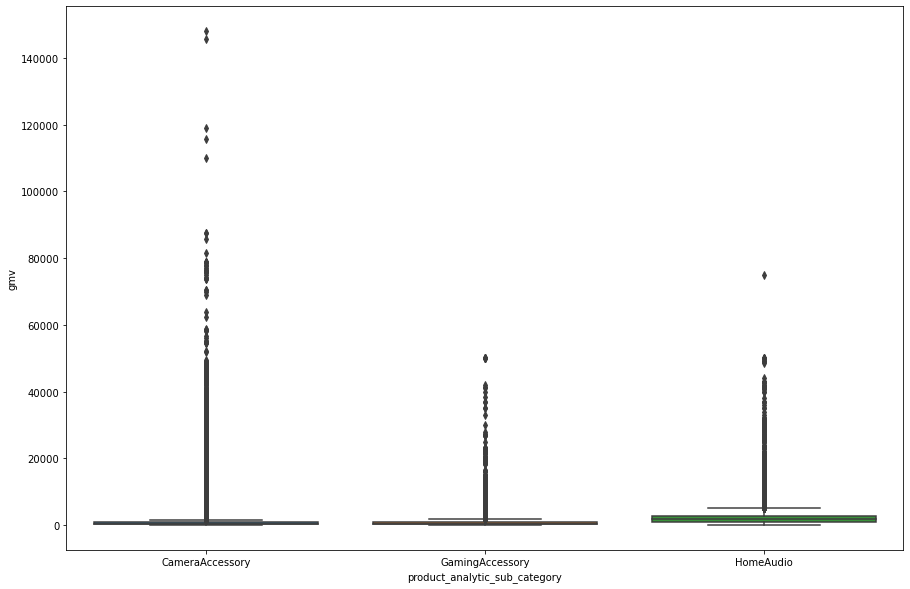

In [175]:
#Let's check outliers in gmv individaully for the three categories
plt.figure(figsize = (15,10))
sns.boxplot(y = 'gmv',data = cust_elec_df, x = 'product_analytic_sub_category')
plt.show()

In [176]:
## large number of outliers in the category CameraAccessory & also some outliers in the other two categories. This needs to be handled

##Capping the values to 0.92 quantile

cust_elec_df.loc[(cust_elec_df.product_analytic_sub_category=='CameraAccessory')]['gmv'].quantile(0.95)
cust_elec_df.loc[(cust_elec_df.product_analytic_sub_category=='HomeAudio')]['gmv'].quantile(0.95)
cust_elec_df.loc[(cust_elec_df.product_analytic_sub_category=='GamingAccessory')]['gmv'].quantile(0.95)

2890.0

<AxesSubplot:xlabel='gmv'>

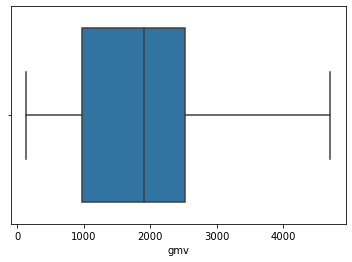

In [177]:
sns.boxplot(cust_elec_df.loc[(cust_elec_df.product_analytic_sub_category=='HomeAudio') & (cust_elec_df.gmv<4706)]['gmv'])

<AxesSubplot:xlabel='gmv'>

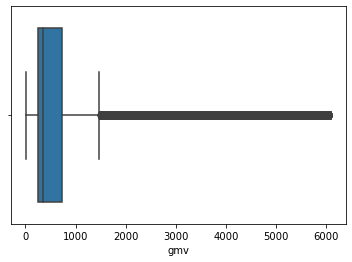

In [178]:
sns.boxplot(cust_elec_df.loc[(cust_elec_df.product_analytic_sub_category=='CameraAccessory') & (cust_elec_df.gmv<6079)]['gmv'])

In [179]:
camera_data = cust_elec_df.loc[(cust_elec_df.product_analytic_sub_category=='CameraAccessory') & (cust_elec_df.gmv<6070)]
gaming_data = cust_elec_df.loc[(cust_elec_df.product_analytic_sub_category=='GamingAccessory') & (cust_elec_df.gmv<3000)]
homeaudio_data = cust_elec_df.loc[(cust_elec_df.product_analytic_sub_category=='HomeAudio') & (cust_elec_df.gmv<4700)]

In [180]:
## concatenating the three categories to a single dataframe data

cust_elec_df = pd.concat([camera_data, gaming_data, homeaudio_data], axis = 0)

In [181]:
cust_elec_df.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 's1_fact.order_payment_type', 'sla', 'cust_id',
       'pincode', 'product_analytic_super_category',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'order_datetime', 'order_week'],
      dtype='object')

In [182]:
cust_elec_df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,2421912925714800,2421912925714800,1990.0,1,COD,10,-1040442942046599936,-7477687762286570496,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,43
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,4416592101738400,4416592101738400,1690.0,1,Prepaid,4,-7604960843527140352,-5835931638776609792,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,42
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,4419525153426400,4419525153426400,1618.0,1,Prepaid,6,2894557208345299968,534735360997241984,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,42
5,ACCCX3S5JGAJETYR,2015-10-17,2015,10,3419188825145600,3419188825145600,3324.0,1,Prepaid,5,-7641546361891739648,-1919052697560310016,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,2015-10-17 12:07:24,42
6,ACCCX3S5JGAJETYR,2015-10-16,2015,10,3418428515041500,3418428515041500,3695.0,1,Prepaid,6,-71561404148106600,6404913202077570048,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,2015-10-16 14:59:57,42


In [183]:
cust_elec_df['Year'] = cust_elec_df['Year'].astype('int')
cust_elec_df['Month'] = cust_elec_df['Month'].astype('int')
cust_elec_df['order_week'] = cust_elec_df['order_week'].astype('int')

In [184]:
## lets drop the irrelavent columns which are not required for analysis

cust_elec_df = cust_elec_df.drop(['fsn_id','order_item_id','pincode','product_analytic_super_category','product_analytic_category'],axis = 1)

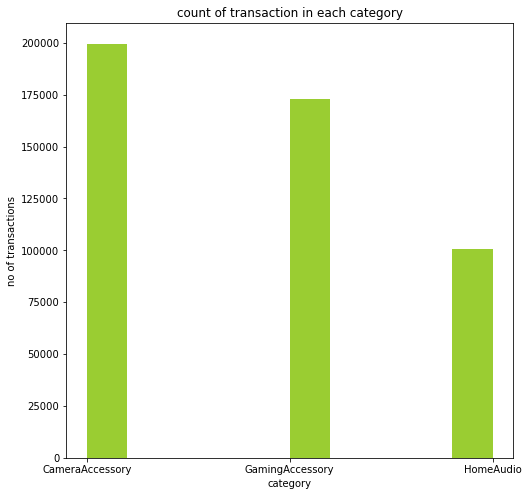

In [185]:
## lets start with EDA 

plt.figure(figsize=(8,8))
plt.hist(cust_elec_df['product_analytic_sub_category'], rwidth= 5,color= ["yellowgreen"])
plt.title("count of transaction in each category")
plt.xlabel("category")
plt.ylabel("no of transactions")
plt.show()


# maximum number of transaction were from Camera Accessory category followed by Gaming Accessory and lastly Home Audio

<AxesSubplot:xlabel='product_analytic_sub_category', ylabel='gmv'>

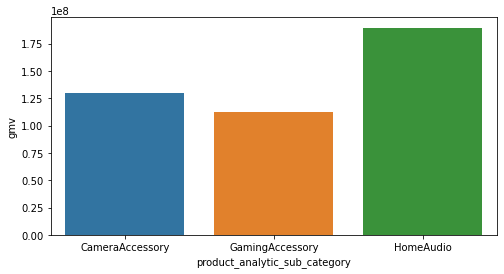

In [186]:
total_revenue = cust_elec_df.groupby('product_analytic_sub_category')['gmv'].sum().reset_index()
plt.figure(figsize = (8,4))
sns.barplot(x='product_analytic_sub_category', y='gmv', data=total_revenue)

## max revenue is coming from the Homeaudio category

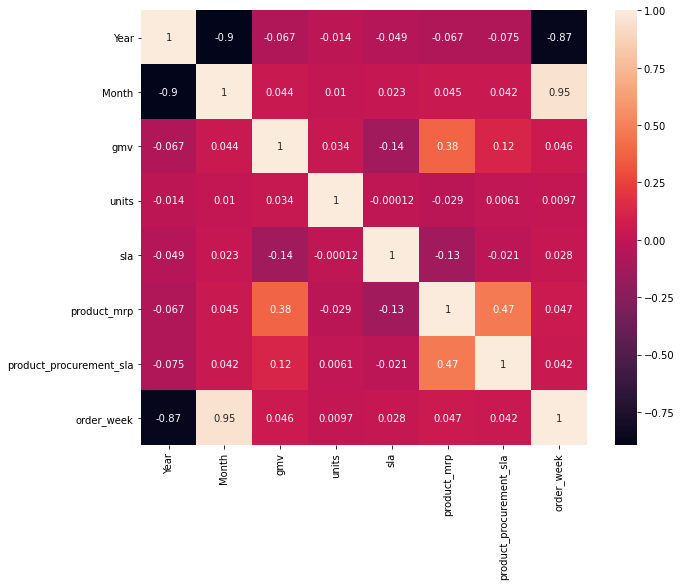

In [187]:
plt.figure(figsize = (10,8))
sns.heatmap(cust_elec_df.corr(), annot=True)
plt.show()

<AxesSubplot:xlabel='product_analytic_sub_category', ylabel='gmv'>

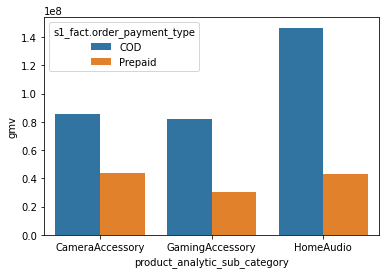

In [188]:
revenue_by_payment_type = cust_elec_df.groupby(["s1_fact.order_payment_type","product_analytic_sub_category"])['gmv'].sum().reset_index()
sns.barplot(x='product_analytic_sub_category', y='gmv', hue="s1_fact.order_payment_type", data=revenue_by_payment_type)

In [189]:
cust_elec_df.head()

,order_date,Year,Month,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week
2,2015-10-20,2015,10,2421912925714800,1990.0,1,COD,10,-1040442942046599936,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,43
3,2015-10-14,2015,10,4416592101738400,1690.0,1,Prepaid,4,-7604960843527140352,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,42
4,2015-10-17,2015,10,4419525153426400,1618.0,1,Prepaid,6,2894557208345299968,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,42
5,2015-10-17,2015,10,3419188825145600,3324.0,1,Prepaid,5,-7641546361891739648,CameraAccessory,CameraTripod,4044,5,2015-10-17 12:07:24,42
6,2015-10-16,2015,10,3418428515041500,3695.0,1,Prepaid,6,-71561404148106600,CameraAccessory,CameraTripod,4044,5,2015-10-16 14:59:57,42


In [190]:
def mapWeek(order_week,year):
    if((year == 2016) & (order_week <= 26)):
         return order_week+53
    else:
        return order_week

In [191]:
def createKPIs(df):
#### KPI 1: Payment mode indicator
    df['payment_mode_indicator'] = df['s1_fact.order_payment_type'].apply(lambda x: 0 if x == "COD" else 1)
#### KPI 2: Selling price of each product in every transaction
    df['selling_price'] = df['gmv']/df['units']
#### KPI 3: Discount offered on  each of the products
    df['discount'] = np.round((df['product_mrp']-df['selling_price'])/df['product_mrp'],2)
    
    return df

In [192]:
def createWeeklyAggregatedCollumns():
#### KPI 4: Total Holidays
    holidays = {'holiday':["2016-01-01", "2016-02-16", "2016-02-14", "2016-03-17", "2016-04-03", "2016-04-06", 
            "2016-05-10", "2016-05-18", "2016-06-21", "2016-06-24", "2015-07-01", "2015-08-03", 
            "2015-09-07", "2015-10-12", "2015-10-31", "2015-11-11", "2015-12-25", "2015-12-26"]}
    holiday_df = createDFFromDict(holidays,"holiday")

#### KPI 5: total Special sale days
    special_sale_days = {'special_sale_day':["2015-07-18","2015-07-19","2015-08-15",
                  "2015-08-16","2015-08-17","2015-08-28",
                  "2015-08-29","2015-08-30","2015-10-15",
                  "2015-10-16","2015-10-17","2015-11-07","2015-11-08","2015-11-09","2015-11-10",
                  "2015-10-11","2015-10-12","2015-11-13","2015-11-14","2015-12-25","2015-12-26",
                  "2015-12-27","2015-12-28","2015-12-29","2015-12-30","2016-01-01","2016-01-02",
                  "2016-01-03","2016-01-20","2016-01-21","2016-01-22","2016-02-01","2016-02-02",
                  "2016-02-20","2016-02-21","2016-02-14","2016-02-15","2016-03-07","2016-03-08",
                  "2016-03-09","2016-05-25","2016-05-26","2016-05-27"]}
    special_sale_day_df = createDFFromDict(special_sale_days,'special_sale_day')

#### KPI 6: total pay days
    #Creating order_day column
    pay_days = {'pay_day':["2015-07-01","2015-07-15","2015-08-01","2015-08-15",
                "2015-09-01","2015-09-15","2015-10-01","2015-10-15","2015-11-01",
                "2015-11-15","2015-12-01","2015-12-15","2016-01-01","2016-01-15",
                "2016-02-01","2016-02-15","2016-03-01","2016-03-15","2016-04-01",
                "2016-04-15","2016-05-01","2016-05-15","2016-06-01","2016-06-15"]}
    pay_days_df = createDFFromDict(pay_days,'pay_day')
    final_df = pd.concat([holiday_df, special_sale_day_df, pay_days_df],axis = 1)
    return final_df.fillna(0).astype('int')

In [248]:
createWeeklyAggregatedCollumns().head()

,total_holidays,is_holiday,total_special_sale_days,is_special_sale_day,total_pay_days,is_pay_day
order_week,,,,,,
27,1,1,0,0,1,1
29,0,0,2,1,1,1
31,0,0,0,0,1,1
32,1,1,0,0,0,0
33,0,0,2,1,1,1


In [194]:
def createDFFromDict(listOfValues, desiredColumnName):
    df = pd.DataFrame(listOfValues)
    df[desiredColumnName] = pd.to_datetime(df[desiredColumnName]).dt.date
    df["total_"+desiredColumnName+"s"] = 1
    df['order_week'] = pd.to_datetime(df[desiredColumnName]).dt.week
    df['year'] = pd.to_datetime(df[desiredColumnName]).dt.year
    df['order_week'] = df.apply(lambda x: mapWeek(x['order_week'],x['year']), axis = 1)
    df = df.groupby('order_week').sum()
    df["is_"+desiredColumnName] = 1
    df.drop('year', axis = 1, inplace = True)
    return df

In [195]:
gaming_data_with_KPIs = createKPIs(gaming_data)
camera_data_with_KPIs = createKPIs(camera_data)
homeaudio_data_with_KPIs = createKPIs(homeaudio_data)


In [196]:
gaming_data_with_KPIs.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,...,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode_indicator,selling_price,discount
1599,ACCCZ34CBVZJTVQF,2015-10-14,2015,10,1416985339691600,1416985339691600,2750.0,1,COD,7,...,GamingHardware,GamingAccessory,GamePad,3999,5,2015-10-14 22:54:54,42,0,2750.0,0.31
1600,ACCCZ34CBVZJTVQF,2015-10-15,2015,10,1417669228375400,1417669228375400,2899.0,1,Prepaid,5,...,GamingHardware,GamingAccessory,GamePad,3999,5,2015-10-15 20:19:38,42,1,2899.0,0.28
1601,ACCCZ34CBVZJTVQF,2015-10-17,2015,10,1419414998353400,1419414998353400,2609.0,1,Prepaid,5,...,GamingHardware,GamingAccessory,GamePad,3999,5,2015-10-17 18:21:43,42,1,2609.0,0.35
1602,ACCCZ34CBVZJTVQF,2015-10-26,2015,10,1427167582532600,1427167582532600,2772.0,1,Prepaid,5,...,GamingHardware,GamingAccessory,GamePad,3999,5,2015-10-26 17:49:39,44,1,2772.0,0.31
1603,ACCCZ34CBVZJTVQF,2015-10-16,2015,10,4417730112316700,4417730112316700,2750.0,1,Prepaid,7,...,GamingHardware,GamingAccessory,GamePad,3999,5,2015-10-16 04:02:08,42,1,2750.0,0.31


In [249]:
homeaudio_data_with_KPIs.head()

,NPS,Stock Index,Year,Month,fsn_id,order_date,order_id,order_item_id,gmv,units,...,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode_indicator,selling_price,discount
0,54.5996,1177,2015,7,ACCCZZC9FYZUQZTE,2015-07-17,172507066,218275916,2850.0,1,...,EntertainmentSmall,Home Audio,HomeAudioSpeaker,4175,1,2015-07-17 09:50:09,29,0,2850.0,0.32
1,54.5996,1177,2015,7,ACCCZZC9FYZUQZTE,2015-07-17,172480103,218245147,2850.0,1,...,EntertainmentSmall,Home Audio,HomeAudioSpeaker,4175,1,2015-07-17 07:18:17,29,0,2850.0,0.32
2,54.5996,1177,2015,7,ACCCZZC9XSFMBH9P,2015-07-14,171342414,216878318,3750.0,1,...,EntertainmentSmall,Home Audio,HomeAudioSpeaker,4599,0,2015-07-14 18:51:53,29,0,3750.0,0.18
3,54.5996,1177,2015,7,ACCCZZC9XSFMBH9P,2015-07-14,171191091,216700320,3750.0,1,...,EntertainmentSmall,Home Audio,HomeAudioSpeaker,4599,0,2015-07-14 13:14:49,29,0,3750.0,0.18
4,54.5996,1177,2015,7,ACCCZZC9XSFMBH9P,2015-07-16,172280022,218016990,3750.0,1,...,EntertainmentSmall,Home Audio,HomeAudioSpeaker,4599,0,2015-07-16 18:11:26,29,0,3750.0,0.18


In [197]:
camera_data_with_KPIs.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,...,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode_indicator,selling_price,discount
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,2421912925714800,2421912925714800,1990.0,1,COD,10,...,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,43,0,1990.0,0.05
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,4416592101738400,4416592101738400,1690.0,1,Prepaid,4,...,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,42,1,1690.0,0.19
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,4419525153426400,4419525153426400,1618.0,1,Prepaid,6,...,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,42,1,1618.0,0.23
5,ACCCX3S5JGAJETYR,2015-10-17,2015,10,3419188825145600,3419188825145600,3324.0,1,Prepaid,5,...,CameraAccessory,CameraAccessory,CameraTripod,4044,5,2015-10-17 12:07:24,42,1,3324.0,0.18
6,ACCCX3S5JGAJETYR,2015-10-16,2015,10,3418428515041500,3418428515041500,3695.0,1,Prepaid,6,...,CameraAccessory,CameraAccessory,CameraTripod,4044,5,2015-10-16 14:59:57,42,1,3695.0,0.09


In [198]:
def createProductPremiumness(df,cut_off):
    df['premium_product'] = df['gmv'].apply(lambda  x:1 if (x >cut_off) else 0)
    return df

In [199]:
camera_data_with_KPIs['gmv'].describe()

count    199584.000000
mean        648.379137
std         780.274982
min          10.000000
25%         248.000000
50%         349.000000
75%         739.000000
max        6069.000000
Name: gmv, dtype: float64

In [200]:
camera_data_with_KPIs = createProductPremiumness(camera_data_with_KPIs,739.0)

In [201]:
camera_data_with_KPIs.head()


,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,...,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode_indicator,selling_price,discount,premium_product
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,2421912925714800,2421912925714800,1990.0,1,COD,10,...,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,43,0,1990.0,0.05,1
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,4416592101738400,4416592101738400,1690.0,1,Prepaid,4,...,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,42,1,1690.0,0.19,1
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,4419525153426400,4419525153426400,1618.0,1,Prepaid,6,...,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,42,1,1618.0,0.23,1
5,ACCCX3S5JGAJETYR,2015-10-17,2015,10,3419188825145600,3419188825145600,3324.0,1,Prepaid,5,...,CameraAccessory,CameraTripod,4044,5,2015-10-17 12:07:24,42,1,3324.0,0.18,1
6,ACCCX3S5JGAJETYR,2015-10-16,2015,10,3418428515041500,3418428515041500,3695.0,1,Prepaid,6,...,CameraAccessory,CameraTripod,4044,5,2015-10-16 14:59:57,42,1,3695.0,0.09,1


In [202]:
gaming_data_with_KPIs = createProductPremiumness(gaming_data_with_KPIs,806.0)

In [203]:
gaming_data_with_KPIs.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,...,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode_indicator,selling_price,discount,premium_product
1599,ACCCZ34CBVZJTVQF,2015-10-14,2015,10,1416985339691600,1416985339691600,2750.0,1,COD,7,...,GamingAccessory,GamePad,3999,5,2015-10-14 22:54:54,42,0,2750.0,0.31,1
1600,ACCCZ34CBVZJTVQF,2015-10-15,2015,10,1417669228375400,1417669228375400,2899.0,1,Prepaid,5,...,GamingAccessory,GamePad,3999,5,2015-10-15 20:19:38,42,1,2899.0,0.28,1
1601,ACCCZ34CBVZJTVQF,2015-10-17,2015,10,1419414998353400,1419414998353400,2609.0,1,Prepaid,5,...,GamingAccessory,GamePad,3999,5,2015-10-17 18:21:43,42,1,2609.0,0.35,1
1602,ACCCZ34CBVZJTVQF,2015-10-26,2015,10,1427167582532600,1427167582532600,2772.0,1,Prepaid,5,...,GamingAccessory,GamePad,3999,5,2015-10-26 17:49:39,44,1,2772.0,0.31,1
1603,ACCCZ34CBVZJTVQF,2015-10-16,2015,10,4417730112316700,4417730112316700,2750.0,1,Prepaid,7,...,GamingAccessory,GamePad,3999,5,2015-10-16 04:02:08,42,1,2750.0,0.31,1


In [251]:
homeaudio_data_with_KPIs = createProductPremiumness(homeaudio_data_with_KPIs,2525.0)

homeaudio_data_with_KPIs.head()

,NPS,Stock Index,Year,Month,fsn_id,order_date,order_id,order_item_id,gmv,units,...,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode_indicator,selling_price,discount,premium_product
0,54.5996,1177,2015,7,ACCCZZC9FYZUQZTE,2015-07-17,172507066,218275916,2850.0,1,...,Home Audio,HomeAudioSpeaker,4175,1,2015-07-17 09:50:09,29,0,2850.0,0.32,1
1,54.5996,1177,2015,7,ACCCZZC9FYZUQZTE,2015-07-17,172480103,218245147,2850.0,1,...,Home Audio,HomeAudioSpeaker,4175,1,2015-07-17 07:18:17,29,0,2850.0,0.32,1
2,54.5996,1177,2015,7,ACCCZZC9XSFMBH9P,2015-07-14,171342414,216878318,3750.0,1,...,Home Audio,HomeAudioSpeaker,4599,0,2015-07-14 18:51:53,29,0,3750.0,0.18,1
3,54.5996,1177,2015,7,ACCCZZC9XSFMBH9P,2015-07-14,171191091,216700320,3750.0,1,...,Home Audio,HomeAudioSpeaker,4599,0,2015-07-14 13:14:49,29,0,3750.0,0.18,1
4,54.5996,1177,2015,7,ACCCZZC9XSFMBH9P,2015-07-16,172280022,218016990,3750.0,1,...,Home Audio,HomeAudioSpeaker,4599,0,2015-07-16 18:11:26,29,0,3750.0,0.18,1


In [258]:
## lets upload the NPS  STOCK data set 

#Reading media data from the excel file
nps_df = pd.read_excel("Media data and other information.xlsx", sheet_name = 'Monthly NPS Score', header = 1).T.reset_index()

# resetting index
nps_df.reset_index(drop=True, inplace=True)

# renaming columns
nps_df.columns = ['NPS', 'Stock Index']
nps_df


,NPS,Stock Index
0,NPS,Stock Index
1,54.5996,1177
2,59.9871,1206
3,46.9254,1101
4,44.3984,1210
5,47,1233
6,45.8,1038
7,47.093,1052
8,50.3274,1222
9,49.0206,1015


In [259]:
nps_df = nps_df[1:]

In [260]:
nps_df.head()

,NPS,Stock Index
1,54.5996,1177
2,59.9871,1206
3,46.9254,1101
4,44.3984,1210
5,47,1233


In [261]:

nps_df.head()

,NPS,Stock Index
1,54.5996,1177
2,59.9871,1206
3,46.9254,1101
4,44.3984,1210
5,47,1233


In [262]:
nps_df['Year']=[2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016]
nps_df['Month']=[7,8,9,10,11,12,1,2,3,4,5,6]

In [263]:
nps_df.head()

,NPS,Stock Index,Year,Month
1,54.5996,1177,2015,7
2,59.9871,1206,2015,8
3,46.9254,1101,2015,9
4,44.3984,1210,2015,10
5,47,1233,2015,11


In [264]:
gaming_data_with_KPIs = pd.merge(nps_df,gaming_data_with_KPIs,on=['Month','Year'],how='inner')
camera_data_with_KPIs = pd.merge(nps_df,camera_data_with_KPIs,on=['Month','Year'],how='inner')
homeaudio_data_with_KPIs = pd.merge(nps_df,homeaudio_data_with_KPIs,on=['Month','Year'],how='inner')

In [211]:
# Creating dataframes for plots for each of the category
GamingAccessory_data_with_KPIs_for_plot = gaming_data_with_KPIs
GamingAccessory_data_with_KPIs_for_plot['product_analytic_sub_category'] = "Gaming Accessory"
CameraAccessory_data_with_KPIs_for_plot = camera_data_with_KPIs
CameraAccessory_data_with_KPIs_for_plot['product_analytic_sub_category'] = "Camera Accessory"
HomeAudio_data_with_KPIs_for_plot = homeaudio_data_with_KPIs
HomeAudio_data_with_KPIs_for_plot['product_analytic_sub_category'] = "Home Audio"

all_data_with_kpi = pd.concat([GamingAccessory_data_with_KPIs_for_plot, CameraAccessory_data_with_KPIs_for_plot, HomeAudio_data_with_KPIs_for_plot], axis = 1) 

In [212]:
all_data_with_kpi.head()

,NPS,Stock Index,Year,Month,fsn_id,order_date,order_id,order_item_id,gmv,units,...,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode_indicator,selling_price,discount
0,54.5996,1177,2015.0,7.0,ACCCZ34CBVZJTVQF,2015-07-10,169460596,214741174,2800.0,1.0,...,EntertainmentSmall,Home Audio,HomeAudioSpeaker,4175.0,1.0,2015-07-17 09:50:09,29.0,0.0,2850.0,0.32
1,54.5996,1177,2015.0,7.0,ACCCZ34CBVZJTVQF,2015-07-20,173845985,219776585,2700.0,1.0,...,EntertainmentSmall,Home Audio,HomeAudioSpeaker,4175.0,1.0,2015-07-17 07:18:17,29.0,0.0,2850.0,0.32
2,54.5996,1177,2015.0,7.0,ACCCZ34CBVZJTVQF,2015-07-26,176570219,222706332,2679.0,1.0,...,EntertainmentSmall,Home Audio,HomeAudioSpeaker,4599.0,0.0,2015-07-14 18:51:53,29.0,0.0,3750.0,0.18
3,54.5996,1177,2015.0,7.0,ACCCZ34CBVZJTVQF,2015-07-08,168513415,213652433,2789.0,1.0,...,EntertainmentSmall,Home Audio,HomeAudioSpeaker,4599.0,0.0,2015-07-14 13:14:49,29.0,0.0,3750.0,0.18
4,54.5996,1177,2015.0,7.0,ACCCZ34CBVZJTVQF,2015-07-17,172787973,218613918,2884.0,1.0,...,EntertainmentSmall,Home Audio,HomeAudioSpeaker,4599.0,0.0,2015-07-16 18:11:26,29.0,0.0,3750.0,0.18


In [213]:
#GamingAccessory Data - Aggregating weekly some features being summed up & for some taking mean
GamingAccessory_data_sum = gaming_data_with_KPIs[['gmv','units','order_week']].groupby('order_week').sum()
GamingAccessory_data_mean = gaming_data_with_KPIs[['sla','product_procurement_sla','order_week',
                                                            'product_mrp','selling_price',"NPS",'discount',]].groupby('order_week').mean()
GamingAccessory_data_count = gaming_data_with_KPIs[['order_id','order_week','premium_product']].groupby('order_week').count().rename(columns={'order_id':'total_transactions','premium_product':'total_premiumness'})

final_gaming_data = pd.concat([GamingAccessory_data_sum, GamingAccessory_data_mean,GamingAccessory_data_count], axis = 1).reset_index()

In [265]:
#Merging with the weekly aggregate collumns
final_gaming_data = pd.merge(final_gaming_data, createWeeklyAggregatedCollumns().reset_index(), on = 'order_week', how = 'left').fillna(0)
final_gaming_data.head()

,order_week,gmv,units,sla,product_procurement_sla,product_mrp,selling_price,discount,total_transactions,total_premiumness,...,total_special_sale_days_x,is_special_sale_day_x,total_pay_days_x,is_pay_day_x,total_holidays_y,is_holiday_y,total_special_sale_days_y,is_special_sale_day_y,total_pay_days_y,is_pay_day_y
0,1,2.497170e+06,4231,5.920281,2.672886,2474.434941,597.000727,0.487167,4127,4127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2.297280e+06,3778,5.899105,2.592894,2220.404665,613.791701,0.461185,3687,3687,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3.496416e+06,5187,5.965311,2.713915,2270.927831,680.538705,0.469518,5016,5016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2.105106e+06,3334,6.113260,2.655310,1476.445672,634.680939,0.452244,3258,3258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2.407259e+06,4046,5.943626,2.528695,1282.682072,600.353619,0.460389,3938,3938,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [215]:
## Camera Accessory

#Camera data  - Aggregating weekly some features being summed up & for some taking mean
CameraAccessory_data_sum = camera_data_with_KPIs[['gmv','units','order_week']].groupby('order_week').sum()
CameraAccessory_data_mean = camera_data_with_KPIs[['sla','product_procurement_sla','order_week','product_mrp',
                                                            'selling_price','discount','NPS']].groupby('order_week').mean()
CameraAccessory_data_count = camera_data_with_KPIs[['order_id','order_week','premium_product']].groupby('order_week').count().rename(columns={'order_id':'total_transactions','premium_product':'total_premiumness'})
final_camera_data = pd.concat([CameraAccessory_data_sum, CameraAccessory_data_mean,CameraAccessory_data_count], axis = 1).reset_index()

In [266]:
#Merging with the weekly aggregate KPIs i.e. total_paydays, total_holidays, is_payday, is_holiday, total_special_days, is_special_day
final_camera_data = pd.merge(final_camera_data, createWeeklyAggregatedCollumns().reset_index(), on = 'order_week', how = 'left').fillna(0)
final_camera_data.head()

,order_week,gmv,units,sla,product_procurement_sla,product_mrp,selling_price,discount,total_transactions,total_premiumness,...,total_special_sale_days_x,is_special_sale_day_x,total_pay_days_x,is_pay_day_x,total_holidays_y,is_holiday_y,total_special_sale_days_y,is_special_sale_day_y,total_pay_days_y,is_pay_day_y
0,1,2983720.0,5064,5.877926,2.863801,1330.610169,592.927966,0.514730,4956,4956,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2334128.0,3596,6.648495,2.623793,1423.218342,652.120670,0.509537,3522,3522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3208310.0,4742,6.421041,2.665370,1408.000216,680.333657,0.506574,4629,4629,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2442874.0,3268,6.685562,2.605700,1522.971813,753.153148,0.466627,3193,3193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,3086604.0,5277,6.372278,2.725894,1380.743974,588.649495,0.531137,5144,5144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [268]:
# Home Audio data
HomeAudio_data_sum = homeaudio_data_with_KPIs[['gmv','units','order_week']].groupby('order_week').sum()
HomeAudio_data_mean = homeaudio_data_with_KPIs[['sla','product_procurement_sla','order_week','product_mrp','selling_price','discount']].groupby('order_week').mean()
HomeAudio_data_count = homeaudio_data_with_KPIs[['order_id','order_week','premium_product']].groupby('order_week').count().rename(columns={'order_id':'total_transactions','premium_product':'total_premiumness'})
final_home_audio_data = pd.concat([HomeAudio_data_sum, HomeAudio_data_mean,HomeAudio_data_count], axis = 1).reset_index()

In [269]:
#Merging with the weekly aggregate KPIs i.e. total_paydays, total_holidays, is_payday, is_holiday, total_special_days, is_special_day
final_home_audio_data = pd.merge(final_home_audio_data, createWeeklyAggregatedCollumns().reset_index(), on = 'order_week', how = 'left').fillna(0)
final_home_audio_data.shape

(50, 16)

In [ ]:
## kjkl

In [ ]:
## continue 

In [217]:
# Reading the media data from the provided file
media_investment = pd.read_excel("Media data and other information.xlsx", sheet_name = 'Media Investment', header = 2)
media_investment.head()

,Unnamed: 0,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,NaN,2015.0,7.0,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,NaN,NaN
1,NaN,2015.0,8.0,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,NaN,NaN
2,NaN,2015.0,9.0,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,NaN,NaN
3,NaN,2015.0,10.0,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN
4,NaN,2015.0,11.0,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,NaN,NaN


In [218]:
#Formatting the dataframe in the required format i.e. removing the extra rows & columns
media_investment = media_investment.iloc[:-4].reset_index()
media_investment.drop('index', inplace = True, axis = 1)

In [219]:
#Converting columns year & month in int type
media_investment['Year']  = media_investment['Year'] .astype('int')
media_investment['Month']  = media_investment['Month'] .astype('int')

In [220]:
media_investment  = media_investment.fillna(0)

In [221]:
media_investment

,Unnamed: 0,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,0.0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.00,0.000000
1,0.0,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,0.00,0.000000
2,0.0,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,0.00,0.000000
3,0.0,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,0.00,0.000000
4,0.0,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,0.00,0.000000
5,0.0,2015,12,106.745312,5.397502,3.063360,56.705419,1.067307,22.503756,6.826938,11.181030,0.00,0.000000
6,0.0,2016,1,74.196000,4.380000,0.456000,4.200000,0.900000,22.900000,7.370000,4.200000,2.70,27.090000
7,0.0,2016,2,48.052000,2.586008,1.912651,11.725555,0.596771,19.892366,6.465019,4.873630,0.00,0.000000
8,0.0,2016,3,100.024621,9.300000,2.100000,41.590000,0.370000,18.437818,6.217667,5.193591,0.87,15.945545
9,0.0,2016,4,56.848241,5.205196,0.871892,24.308354,0.034876,16.514510,5.693456,4.219958,0.00,0.000000


In [271]:
#Creating a mapping of the Months & no of weeks in order to find the media data weekly for each of the months
number_of_weeks = {'Month':[1,2,3,4,5,6,7,8,9,10,11,12], 'number_of_weeks':[4,4,5,4,4,5,4,4,5,4,4,5]}
number_of_weeks_df = pd.DataFrame(number_of_weeks)
number_of_weeks_df

,Month,number_of_weeks
0,1,4
1,2,4
2,3,5
3,4,4
4,5,4
5,6,5
6,7,4
7,8,4
8,9,5
9,10,4


In [272]:
#Merging the media_investment data with DF containing the mapping of months & no of weeks in that month
media_investment = pd.merge(media_investment,number_of_weeks_df, on = 'Month', how = 'inner')
media_investment

,Unnamed: 0,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,number_of_weeks
0,0.0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.0,0.00,4
1,0.0,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,0.0,0.00,4
2,0.0,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,0.0,0.00,5
3,0.0,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,0.0,0.00,4
4,0.0,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,0.0,0.00,4
5,0.0,2015,12,106.745312,5.397502,3.063360,56.705419,1.067307,22.503756,6.826938,11.181030,0.0,0.00,5
6,0.0,2016,1,74.196000,4.380000,0.456000,4.200000,0.900000,22.900000,7.370000,4.200000,2.7,27.09,4
7,0.0,2016,2,48.052000,2.586008,1.912651,11.725555,0.596771,19.892366,6.465019,4.873630,0.0,0.00,4


In [273]:
# Calculating the final media_investments weekly by dividing the value in a month with the respecitve number_of_weeks in the month
media_investment['TV']  = media_investment['TV']/media_investment['number_of_weeks']
media_investment['Digital']  = media_investment['Digital']/media_investment['number_of_weeks']
media_investment['Sponsorship']  = media_investment['Sponsorship']/media_investment['number_of_weeks']
media_investment['Content Marketing']  = media_investment['Content Marketing']/media_investment['number_of_weeks']
media_investment['Online marketing']  = media_investment['Online marketing']/media_investment['number_of_weeks']
media_investment[' Affiliates']  = media_investment[' Affiliates']/media_investment['number_of_weeks']
media_investment['SEM']  = media_investment['SEM']/media_investment['number_of_weeks']
media_investment['Radio']  = media_investment['Radio']/media_investment['number_of_weeks']
media_investment['Other']  = media_investment['Other']/media_investment['number_of_weeks']

In [274]:
media_investment.head()

,Unnamed: 0,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,number_of_weeks
0,0.0,2015,7,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,0.0,0.0,4
1,0.0,2015,8,5.064306,0.001610,0.319518,0.265833,0.000002,0.032311,0.018421,0.628382,0.0,0.0,4
2,0.0,2015,9,96.254380,0.775901,0.271306,12.557530,0.122058,3.275998,1.007653,1.240430,0.0,0.0,5
3,0.0,2015,10,170.156297,1.536178,3.155620,21.168133,0.861019,6.092944,1.743428,7.981753,0.0,0.0,4
4,0.0,2015,11,51.216220,1.055157,0.318867,3.543029,0.042158,4.890394,1.648942,1.305508,0.0,0.0,4


In [276]:
# Getting unique order_week, month & year present in the original DF
order_week_data = cust_elec_df[['order_week',"Month","Year"]].drop_duplicates(keep = 'first', subset = None).reset_index().drop('index', axis = 1).sort_values(by = 'order_week')
order_week_data = cust_elec_df.sort_values(by = ['order_week','Month']).drop_duplicates(keep = 'last', subset = 'order_week')
order_week_data

,order_date,Year,Month,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week
637970,2016-01-05,2016,1,4488434008820800,4599.0,1,COD,8,8891253609836390400,HomeAudio,VoiceRecorder,10500,5,2016-01-05 15:39:31,1
637897,2016-01-13,2016,1,2495238628395500,999.0,1,COD,10,5210973995469280256,HomeAudio,VoiceRecorder,2100,2,2016-01-13 12:34:05,2
1465926,2016-01-19,2016,1,1402325059920300,300.0,1,Prepaid,5,312534123209185024,HomeAudio,HomeAudioSpeaker,550,2,2016-01-19 19:23:50,3
637975,2016-01-30,2016,1,1510025829338400,4549.0,1,COD,10,-2579474879139500032,HomeAudio,VoiceRecorder,10500,5,2016-01-30 15:19:41,4
782201,2016-02-02,2016,2,1512568277866300,4549.0,1,COD,3,4548554652287569920,HomeAudio,VoiceRecorder,10500,5,2016-02-02 13:56:02,5
782203,2016-02-10,2016,2,4519372256210200,4549.0,1,COD,5,8988437453600589824,HomeAudio,VoiceRecorder,10500,5,2016-02-10 10:56:53,6
935770,2016-02-18,2016,2,2536809684992600,926.0,1,COD,4,8425214545553340416,HomeAudio,VoiceRecorder,2499,2,2016-02-18 11:26:41,7
1460904,2016-02-22,2016,2,3404515381500400,1955.0,1,Prepaid,5,-5502515064772299776,HomeAudio,HomeAudioSpeaker,3779,1,2016-02-22 23:42:11,8
936117,2016-03-01,2016,3,3536683211538300,4450.0,1,Prepaid,4,-5153624439022919680,HomeAudio,VoiceRecorder,10500,5,2016-03-01 11:52:08,9
936121,2016-03-13,2016,3,3547377306833000,4410.0,1,Prepaid,4,7452223388905860096,HomeAudio,VoiceRecorder,10500,5,2016-03-13 20:54:07,10


In [283]:
# Merging the media_investment_data with the order_week_data to add order_week into this DF for final merging with other DF containing the KPIs
media_investment_weekly = pd.merge(order_week_data, media_investment, on = ["Month","Year"], how = "inner").drop('number_of_weeks', axis =1)
media_investment_weekly.columns

Index(['order_date', 'Year', 'Month', 'order_id', 'gmv', 'units',
       's1_fact.order_payment_type', 'sla', 'cust_id',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla', 'order_datetime',
       'order_week', 'Unnamed: 0', 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates',
       'SEM', 'Radio', 'Other'],
      dtype='object')

In [285]:
media_investment.head()

,Unnamed: 0,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,number_of_weeks
0,0.0,2015,7,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,0.0,0.0,4
1,0.0,2015,8,5.064306,0.001610,0.319518,0.265833,0.000002,0.032311,0.018421,0.628382,0.0,0.0,4
2,0.0,2015,9,96.254380,0.775901,0.271306,12.557530,0.122058,3.275998,1.007653,1.240430,0.0,0.0,5
3,0.0,2015,10,170.156297,1.536178,3.155620,21.168133,0.861019,6.092944,1.743428,7.981753,0.0,0.0,4
4,0.0,2015,11,51.216220,1.055157,0.318867,3.543029,0.042158,4.890394,1.648942,1.305508,0.0,0.0,4


In [284]:
order_week_data.head()

,order_date,Year,Month,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week
637970,2016-01-05,2016,1,4488434008820800,4599.0,1,COD,8,8891253609836390400,HomeAudio,VoiceRecorder,10500,5,2016-01-05 15:39:31,1
637897,2016-01-13,2016,1,2495238628395500,999.0,1,COD,10,5210973995469280256,HomeAudio,VoiceRecorder,2100,2,2016-01-13 12:34:05,2
1465926,2016-01-19,2016,1,1402325059920300,300.0,1,Prepaid,5,312534123209185024,HomeAudio,HomeAudioSpeaker,550,2,2016-01-19 19:23:50,3
637975,2016-01-30,2016,1,1510025829338400,4549.0,1,COD,10,-2579474879139500032,HomeAudio,VoiceRecorder,10500,5,2016-01-30 15:19:41,4
782201,2016-02-02,2016,2,1512568277866300,4549.0,1,COD,3,4548554652287569920,HomeAudio,VoiceRecorder,10500,5,2016-02-02 13:56:02,5


In [288]:
def getAdStockValue(media_investment_weekly,col_name, adstock_rate):
    media_investment_weekly['week_carry_over_1_value'] = adstock_rate**1 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_2_value'] = adstock_rate**2 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_3_value'] = adstock_rate**3 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_4_value'] = adstock_rate**4 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_5_value'] = adstock_rate**5 * media_investment_weekly[col_name]
    for i in range(0, len(media_investment_weekly)):
        week1CarryOverValue  = media_investment_weekly.loc[i-1,["week_carry_over_1_value"]][0] if(i-1 > -1) else 0
        week2CarryOverValue  = media_investment_weekly.loc[i-2,["week_carry_over_2_value"]][0] if(i-2 > -1) else 0
        week3CarryOverValue  = media_investment_weekly.loc[i-3,["week_carry_over_3_value"]][0] if(i-3 > -1) else 0
        week4CarryOverValue  = media_investment_weekly.loc[i-4,["week_carry_over_4_value"]][0] if(i-4 > -1) else 0
        week5CarryOverValue  = media_investment_weekly.loc[i-5,["week_carry_over_5_value"]][0] if(i-5 > -1) else 0
        media_investment_weekly.loc[i,"adStock_"+col_name] = media_investment_weekly.loc[i,[col_name]][0] + week1CarryOverValue + week2CarryOverValue + week3CarryOverValue + week4CarryOverValue + week5CarryOverValue
    return media_investment_weekly[["order_week","adStock_"+col_name]]

In [279]:
#Creating adstocks for each of the investments by calling the above created function
adStock_TV = getAdStockValue(media_investment_weekly[['TV','order_week']],"TV", 0.5)[["adStock_TV"]]
adStock_digital = getAdStockValue(media_investment_weekly[['Digital','order_week']],"Digital", 0.5)[["adStock_Digital"]]
adStock_sponsorship = getAdStockValue(media_investment_weekly[['Sponsorship','order_week']],"Sponsorship", 0.5)[["adStock_Sponsorship"]]
adStock_content_marketing = getAdStockValue(media_investment_weekly[['Content Marketing','order_week']],"Content Marketing", 0.5)[["adStock_Content Marketing"]]
adStock_online_marketing = getAdStockValue(media_investment_weekly[['Online marketing','order_week']],"Online marketing", 0.5)[["adStock_Online marketing"]]
adStock_affiliates = getAdStockValue(media_investment_weekly[[' Affiliates','order_week']]," Affiliates", 0.5)[["adStock_ Affiliates"]]
adStock_SEM = getAdStockValue(media_investment_weekly[['SEM','order_week']],"SEM", 0.5)[["adStock_SEM"]]
adStock_radio = getAdStockValue(media_investment_weekly[['Radio','order_week']],"Radio", 0.5)[["adStock_Radio"]]
adStock_other = getAdStockValue(media_investment_weekly[['Other','order_week']],"Other", 0.5)

In [289]:
all_adstock = pd.concat([adStock_TV,adStock_digital,adStock_sponsorship, adStock_content_marketing, adStock_online_marketing, adStock_affiliates, adStock_SEM, adStock_radio, adStock_other], axis = 1)

In [290]:
all_adstock.columns

Index(['adStock_TV', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'order_week',
       'adStock_Other'],
      dtype='object')

In [291]:
final_adstock_data = pd.merge(media_investment_weekly,all_adstock, on = "order_week", how = 'inner')

In [292]:
final_adstock_data.drop(['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other'],inplace = True, axis = 1)


<AxesSubplot:>

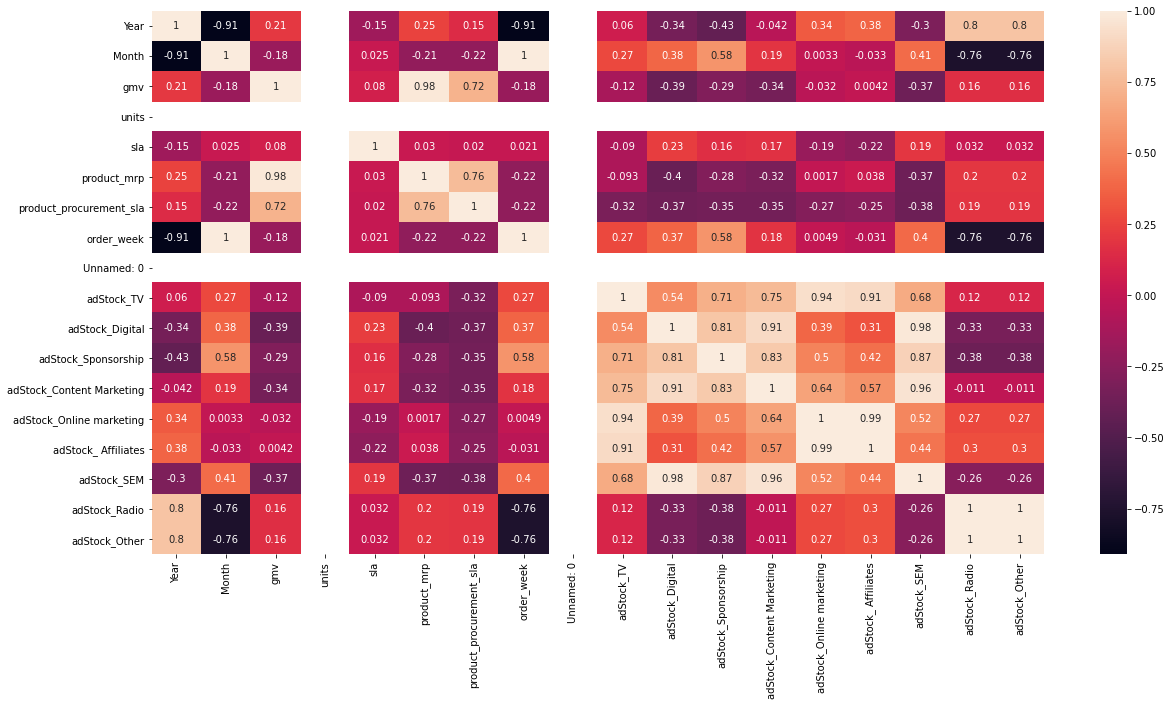

In [293]:
plt.figure(figsize = (20,10))
sns.heatmap(final_adstock_data.corr(), annot = True)

In [294]:
#Preparing final_data for 3 categories by adding the adstock data
final_camera_data = pd.merge(final_adstock_data,final_camera_data, on = "order_week", how = 'right')
final_gaming_data = pd.merge(final_adstock_data,final_gaming_data, on = "order_week", how = 'right')
final_home_audio_data = pd.merge(final_adstock_data,final_home_audio_data, on = "order_week", how = 'right')

In [295]:
#Checking the shape of the final dataframes
print("Shape of Gaming Accessory DF",final_gaming_data.shape)
print("Shape of Camera Accessory DF",final_camera_data.shape)
print("Shape of Home Audio DF",final_home_audio_data.shape)

Shape of Gaming Accessory DF (53, 46)
Shape of Camera Accessory DF (52, 46)
Shape of Home Audio DF (50, 40)


In [222]:
#Formatting the dataframe in the required format i.e. removing the extra rows & columns
media_investment = media_investment.iloc[:-4].reset_index()
media_investment.drop('index', inplace = True, axis = 1)

In [223]:
#Converting columns year & month in int type
media_investment['Year']  = media_investment['Year'] .astype('int')
media_investment['Month']  = media_investment['Month'] .astype('int')

In [224]:
#Filling NaN values as 0 assuming that the investment done in respective area was 0
media_investment  = media_investment.fillna(0)

In [225]:
#Checking the final media_investment DF
media_investment

,Unnamed: 0,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,0.0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.0,0.00
1,0.0,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,0.0,0.00
2,0.0,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,0.0,0.00
3,0.0,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,0.0,0.00
4,0.0,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,0.0,0.00
5,0.0,2015,12,106.745312,5.397502,3.063360,56.705419,1.067307,22.503756,6.826938,11.181030,0.0,0.00
6,0.0,2016,1,74.196000,4.380000,0.456000,4.200000,0.900000,22.900000,7.370000,4.200000,2.7,27.09
7,0.0,2016,2,48.052000,2.586008,1.912651,11.725555,0.596771,19.892366,6.465019,4.873630,0.0,0.00


In [226]:
print("Shape of Gaming Accessory DF",final_gaming_data.shape)
print("Shape of Camera Accessory DF",final_camera_data.shape)


Shape of Gaming Accessory DF (53, 16)
Shape of Camera Accessory DF (52, 16)


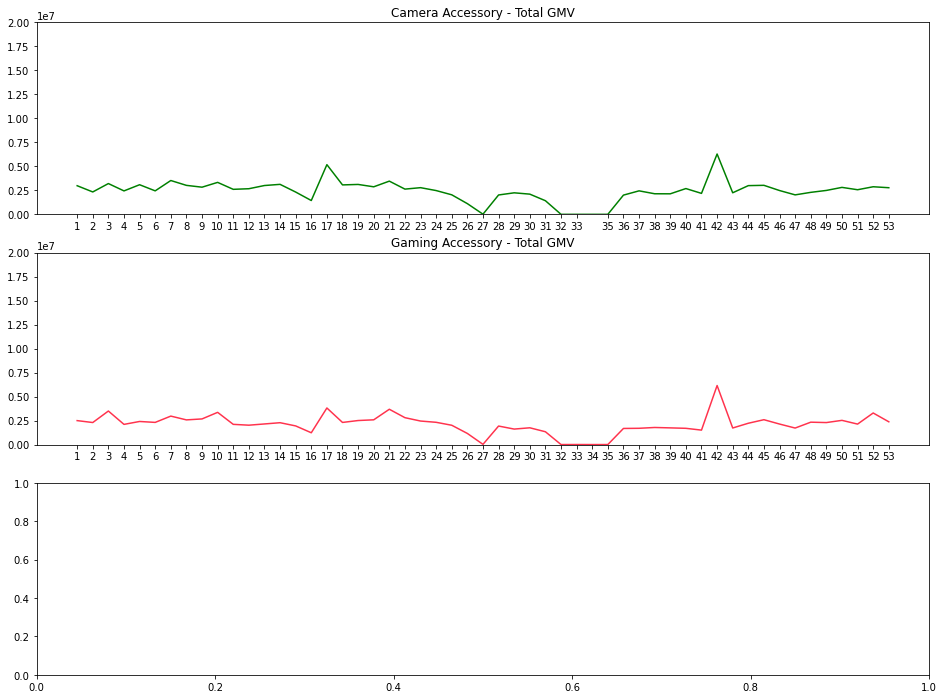

In [227]:
fig, axes= plt.subplots(nrows=3, ncols=1,figsize=(16,12))

ax2 = plt.subplot(3,1,1)
ax2.set_ylim(0,20000000)
ax2 = plt.title('Camera Accessory - Total GMV')
ax2 = plt.plot(final_camera_data['order_week'],final_camera_data['gmv'],color='g')
plt.xticks(final_camera_data['order_week'])

ax3 = plt.subplot(3,1,2)
ax3.set_ylim(0,20000000)
ax3 = plt.title('Gaming Accessory - Total GMV')
ax3 = plt.plot(final_gaming_data['order_week'],final_gaming_data['gmv'],color=(1.0,0.2,0.3))
plt.xticks(final_gaming_data['order_week'])

plt.show()

In [228]:
Holiday_week_sale_CA = final_camera_data.groupby('is_holiday')[['gmv']].mean().reset_index()
Holiday_week_sale_GA = final_gaming_data.groupby('is_holiday')[['gmv']].mean().reset_index()

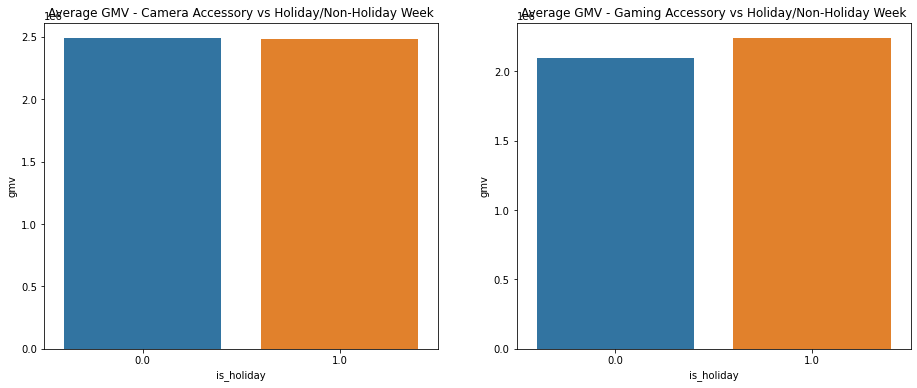

In [229]:
# increase figure size 
plt.figure(figsize=(24,6))

# subplot 3: Average GMV - Camera Accessory vs Holiday/Non-Holiday Week
ax2 = plt.subplot(1, 3, 1)
# ax2.set_ylim(0,8000000)
ax2 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_CA)
ax2 = plt.title("Average GMV - Camera Accessory vs Holiday/Non-Holiday Week")

# subplot 5: Average GMV - Gaming Accessory vs Holiday/Non-Holiday Week
ax3 = plt.subplot(1, 3, 2)
# ax3.set_ylim(0,8000000)
ax3 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_GA)
ax3 = plt.title("Average GMV - Gaming Accessory vs Holiday/Non-Holiday Week")

plt.show()


In [230]:
Holiday_week_sale_CA = final_camera_data.groupby('is_holiday')[['gmv']].sum().reset_index()
Holiday_week_sale_GA = final_gaming_data.groupby('is_holiday')[['gmv']].sum().reset_index()

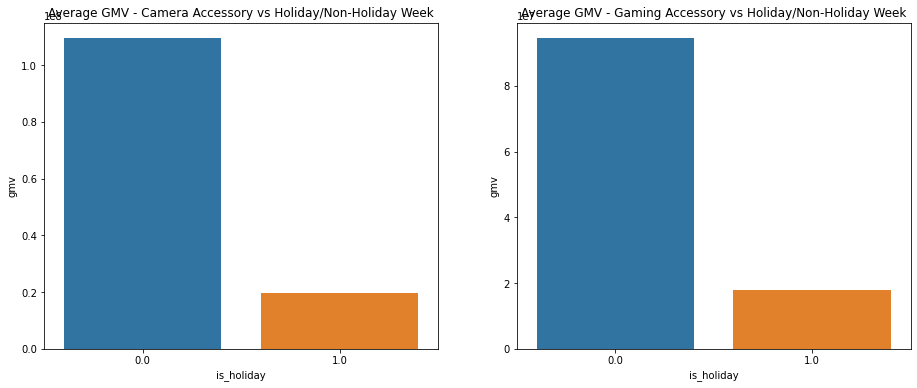

In [231]:


# subplot 3: Average GMV - Camera Accessory vs Holiday/Non-Holiday Week

plt.figure(figsize=(24,6))

ax2 = plt.subplot(1, 3, 1)
# ax2.set_ylim(0,8000000)
ax2 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_CA)
ax2 = plt.title("Average GMV - Camera Accessory vs Holiday/Non-Holiday Week")

# subplot 5: Average GMV - Gaming Accessory vs Holiday/Non-Holiday Week
ax3 = plt.subplot(1, 3, 2)
# ax3.set_ylim(0,8000000)
ax3 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_GA)
ax3 = plt.title("Average GMV - Gaming Accessory vs Holiday/Non-Holiday Week")

plt.show()

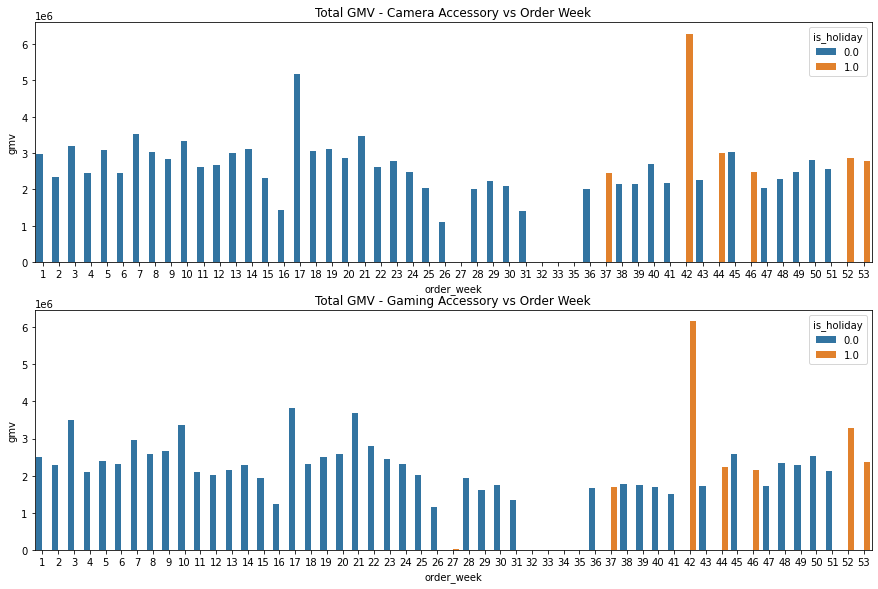

In [232]:


#Analyzing the total gmv over the weeks based upon whether the week contained a holiday or not for all the three categories



plt.figure(figsize = (15,15))
ax1 = plt.subplot(3, 1, 1)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_camera_data, hue = 'is_holiday')
ax1 = plt.title("Total GMV - Camera Accessory vs Order Week")

ax1 = plt.subplot(3, 1, 2)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_gaming_data, hue = 'is_holiday')
ax1 = plt.title("Total GMV - Gaming Accessory vs Order Week")

plt.show()

In [324]:
climate_2015 = pd.read_excel('ONTARIO-2015.xlsx', skiprows=24)

climate_2015.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2015-01-01,2015,1,1,†,0.0,NaN,-8.5,NaN,-4.3,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,2015,1,2,†,3.0,NaN,-3.0,NaN,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,2015,1,3,†,2.5,NaN,-4.0,NaN,-0.8,...,0.0,NaN,24.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2015-01-04,2015,1,4,†,2.5,NaN,0.0,NaN,1.3,...,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,2015-01-05,2015,1,5,†,-10.0,NaN,-13.5,NaN,-11.8,...,3.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [325]:
# Skipping the first 24 rows while reading the data to ignore the metadata

climate_2016 = pd.read_excel('ONTARIO-2016.xlsx', skiprows=24)

climate_2016.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2016-01-01,2016,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,2016,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03,2016,1,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-04,2016,1,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-05,2016,1,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [235]:
# Dropping the columns with all nulls

climate_2015.dropna(axis=1, thresh=1, inplace=True)

climate_2015.reset_index(drop=True, inplace=True)

climate_2016.dropna(axis=1, thresh=1, inplace=True)

climate_2016.reset_index(drop=True, inplace=True)

climate_2016.head(10)


,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag
0,2016-01-01,2016,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,2016,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03,2016,1,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-04,2016,1,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-05,2016,1,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-01-06,2016,1,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2016-01-07,2016,1,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016-01-08,2016,1,8,†,7.0,NaN,-14.0,NaN,-3.5,...,0.0,NaN,9.0,NaN,0.0,NaN,9.0,NaN,0.0,NaN
8,2016-01-09,2016,1,9,†,11.0,NaN,3.0,NaN,7.0,...,0.0,NaN,14.6,NaN,0.0,T,14.6,NaN,0.0,NaN
9,2016-01-10,2016,1,10,†,-1.5,NaN,-5.0,NaN,-3.3,...,0.0,NaN,0.0,NaN,7.0,NaN,7.0,NaN,0.0,T


In [326]:
# Dropping columns with only one distinct value

drop_cols = []

for col in climate_2015.columns:
    if 'Flag' in col:
        print(climate_2015[col].value_counts())
        print()
        drop_cols.append(col)

drop_cols.append('Data Quality')

climate_2015.drop(drop_cols, axis=1, inplace=True)

print(climate_2015.columns)

M    13
Name: Max Temp Flag, dtype: int64

M    39
Name: Min Temp Flag, dtype: int64

M    39
Name: Mean Temp Flag, dtype: int64

M    39
Name: Heat Deg Days Flag, dtype: int64

M    39
Name: Cool Deg Days Flag, dtype: int64

T    7
Name: Total Rain Flag, dtype: int64

T    9
Name: Total Snow Flag, dtype: int64

T    12
Name: Total Precip Flag, dtype: int64

T    2
Name: Snow on Grnd Flag, dtype: int64

Series([], Name: Dir of Max Gust Flag, dtype: int64)

Series([], Name: Spd of Max Gust Flag, dtype: int64)

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)',
       'Spd of Max Gust (km/h)'],
      dtype='object')


In [327]:
# Dropping columns with only one distinct value

drop_cols = []

for col in climate_2016.columns:
    if 'Flag' in col:
        print(climate_2016[col].value_counts())
        print()
        drop_cols.append(col)

drop_cols.append('Data Quality')

climate_2016.drop(drop_cols, axis=1, inplace=True)

print(climate_2016.columns)

M    1
Name: Max Temp Flag, dtype: int64

M    8
Name: Min Temp Flag, dtype: int64

M    8
Name: Mean Temp Flag, dtype: int64

M    8
Name: Heat Deg Days Flag, dtype: int64

M    8
Name: Cool Deg Days Flag, dtype: int64

T    3
Name: Total Rain Flag, dtype: int64

T    7
Name: Total Snow Flag, dtype: int64

T    7
Name: Total Precip Flag, dtype: int64

T    6
Name: Snow on Grnd Flag, dtype: int64

Series([], Name: Dir of Max Gust Flag, dtype: int64)

Series([], Name: Spd of Max Gust Flag, dtype: int64)

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)',
       'Spd of Max Gust (km/h)'],
      dtype='object')


In [328]:
# Formatting column names

climate_2015.columns = [col.replace(' (°C)','').strip() for col in climate_2015.columns]
climate_2016.columns = [col.replace(' (°C)','').strip() for col in climate_2016.columns]
climate_2015.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp', 'Min Temp',
       'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)',
       'Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)'],
      dtype='object')

In [329]:
# Dropping rows where all the columns have nulls

cols = ['Mean Temp',
 'Total Rain (mm)']

climate_2015.dropna(subset=cols, inplace=True)

climate_2015.reset_index(drop=True, inplace=True)

climate_2016.dropna(subset=cols, inplace=True)

climate_2016.reset_index(drop=True, inplace=True)

climate_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date/Time                  190 non-null    datetime64[ns]
 1   Year                       190 non-null    int64         
 2   Month                      190 non-null    int64         
 3   Day                        190 non-null    int64         
 4   Max Temp                   190 non-null    float64       
 5   Min Temp                   190 non-null    float64       
 6   Mean Temp                  190 non-null    float64       
 7   Heat Deg Days              190 non-null    float64       
 8   Cool Deg Days              190 non-null    float64       
 9   Total Rain (mm)            190 non-null    float64       
 10  Total Snow (cm)            190 non-null    float64       
 11  Total Precip (mm)          190 non-null    float64       
 12  Snow on 

In [330]:
import datetime


In [309]:
 climate_2015['Date/Time'].astype(str)

0     2015-07-01
1     2015-07-02
2     2015-07-03
3     2015-07-04
4     2015-07-05
         ...    
93    2015-12-19
94    2015-12-20
95    2015-12-22
96    2015-12-23
97    2015-12-29
Name: Date/Time, Length: 98, dtype: object

In [331]:
climate_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date/Time                  190 non-null    datetime64[ns]
 1   Year                       190 non-null    int64         
 2   Month                      190 non-null    int64         
 3   Day                        190 non-null    int64         
 4   Max Temp                   190 non-null    float64       
 5   Min Temp                   190 non-null    float64       
 6   Mean Temp                  190 non-null    float64       
 7   Heat Deg Days              190 non-null    float64       
 8   Cool Deg Days              190 non-null    float64       
 9   Total Rain (mm)            190 non-null    float64       
 10  Total Snow (cm)            190 non-null    float64       
 11  Total Precip (mm)          190 non-null    float64       
 12  Snow on 

In [332]:
climate_2015['order_week'] = pd.DatetimeIndex(climate_2015["Date/Time"]).week

In [333]:
climate_2015['order_week'] = climate_2015['order_week'].apply(lambda x: str(x).lstrip('0'))

In [334]:
climate_2015.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),order_week
0,2015-01-01,2015,1,1,0.0,-8.5,-4.3,22.3,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1
1,2015-01-02,2015,1,2,3.0,-3.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1
2,2015-01-03,2015,1,3,2.5,-4.0,-0.8,18.8,0.0,24.0,0.0,24.0,0.0,NaN,NaN,1
3,2015-01-04,2015,1,4,2.5,0.0,1.3,16.7,0.0,0.0,1.0,1.0,0.0,NaN,NaN,1
4,2015-01-05,2015,1,5,-10.0,-13.5,-11.8,29.8,0.0,0.0,3.0,3.0,1.0,NaN,NaN,2


In [335]:
climate_2016

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
0,2016-01-08,2016,1,8,7.0,-14.0,-3.5,21.5,0.0,9.0,0.0,9.0,0.0,NaN,NaN
1,2016-01-09,2016,1,9,11.0,3.0,7.0,11.0,0.0,14.6,0.0,14.6,0.0,NaN,NaN
2,2016-01-10,2016,1,10,-1.5,-5.0,-3.3,21.3,0.0,0.0,7.0,7.0,0.0,NaN,NaN
3,2016-01-12,2016,1,12,-5.0,-12.0,-8.5,26.5,0.0,0.0,0.0,0.0,12.0,NaN,NaN
4,2016-01-14,2016,1,14,2.5,-10.5,-4.0,22.0,0.0,0.0,0.0,0.0,11.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,2016-12-26,2016,12,26,13.0,0.5,6.8,11.2,0.0,14.4,0.0,14.4,3.0,NaN,NaN
215,2016-12-27,2016,12,27,0.5,-2.0,-0.8,18.8,0.0,0.0,0.0,0.0,0.0,NaN,NaN
216,2016-12-29,2016,12,29,6.0,-1.5,2.3,15.7,0.0,0.0,0.0,0.0,0.0,NaN,NaN
217,2016-12-30,2016,12,30,2.5,-2.5,0.0,18.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [336]:
climate_2016['order_week'] = pd.DatetimeIndex(climate_2016["Date/Time"]).week

climate_2016['order_week'] = climate_2016['order_week'].apply(lambda x: str(x).lstrip('0'))

In [337]:
climate_2015['order_week'] = climate_2015['order_week'].astype(int)

In [338]:
climate_2016['order_week'] = climate_2016['order_week'].astype(int)

In [339]:
#Mapping order_week according to the new logic
climate_2016['order_week'] = climate_2016.apply(lambda x: mapWeek(x['order_week'],x['Year']), axis = 1)

In [341]:
# Extracting July to Dec month's data

climate_2015 = climate_2015[climate_2015['Month'] >= 7]
climate_2015.reset_index(drop=True, inplace=True)

climate_2015

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),order_week
0,2015-07-01,2015,7,1,24.5,17.0,20.8,0.0,2.8,0.0,0.0,0.0,0.0,NaN,NaN,27
1,2015-07-02,2015,7,2,24.0,14.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,27
2,2015-07-03,2015,7,3,25.0,10.0,17.5,0.5,0.0,0.0,0.0,0.0,0.0,NaN,NaN,27
3,2015-07-04,2015,7,4,26.0,11.0,18.5,0.0,0.5,0.0,0.0,0.0,0.0,NaN,NaN,27
4,2015-07-05,2015,7,5,28.0,14.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0,NaN,NaN,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2015-12-19,2015,12,19,3.0,-4.0,-0.5,18.5,0.0,0.0,0.0,0.0,0.0,NaN,NaN,51
94,2015-12-20,2015,12,20,5.5,-5.0,0.3,17.7,0.0,7.0,0.0,7.0,0.0,NaN,NaN,51
95,2015-12-22,2015,12,22,11.5,4.0,7.8,10.2,0.0,0.0,0.0,0.0,0.0,NaN,NaN,52
96,2015-12-23,2015,12,23,15.5,1.0,8.3,9.7,0.0,10.4,0.0,10.4,0.0,NaN,NaN,52


In [342]:
# Extracting Jan to June month's data

climate_2016 = climate_2016[climate_2016['Month'] <= 6]
climate_2016.reset_index(drop=True, inplace=True)

climate_2016

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),order_week
0,2016-01-08,2016,1,8,7.0,-14.0,-3.5,21.5,0.0,9.0,0.0,9.0,0.0,NaN,NaN,54
1,2016-01-09,2016,1,9,11.0,3.0,7.0,11.0,0.0,14.6,0.0,14.6,0.0,NaN,NaN,54
2,2016-01-10,2016,1,10,-1.5,-5.0,-3.3,21.3,0.0,0.0,7.0,7.0,0.0,NaN,NaN,54
3,2016-01-12,2016,1,12,-5.0,-12.0,-8.5,26.5,0.0,0.0,0.0,0.0,12.0,NaN,NaN,55
4,2016-01-14,2016,1,14,2.5,-10.5,-4.0,22.0,0.0,0.0,0.0,0.0,11.0,NaN,NaN,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2016-06-24,2016,6,24,29.0,13.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0,NaN,NaN,78
89,2016-06-25,2016,6,25,30.5,13.0,21.8,0.0,3.8,0.0,0.0,0.0,0.0,NaN,NaN,78
90,2016-06-26,2016,6,26,34.0,18.5,26.3,0.0,8.3,3.2,0.0,3.2,0.0,NaN,NaN,78
91,2016-06-27,2016,6,27,34.5,20.0,27.3,0.0,9.3,0.0,0.0,0.0,0.0,NaN,NaN,79


In [344]:
climate = pd.concat([climate_2015, climate_2016], axis = 0)

climate.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),order_week
0,2015-07-01,2015,7,1,24.5,17.0,20.8,0.0,2.8,0.0,0.0,0.0,0.0,NaN,NaN,27
1,2015-07-02,2015,7,2,24.0,14.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,27
2,2015-07-03,2015,7,3,25.0,10.0,17.5,0.5,0.0,0.0,0.0,0.0,0.0,NaN,NaN,27
3,2015-07-04,2015,7,4,26.0,11.0,18.5,0.0,0.5,0.0,0.0,0.0,0.0,NaN,NaN,27
4,2015-07-05,2015,7,5,28.0,14.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0,NaN,NaN,27


In [345]:
# Dropping redundant columns
climate_data=climate.drop('Max Temp',axis=1)
climate_data=climate_data.drop('Min Temp',axis=1)
climate_data=climate_data.drop('Heat Deg Days',axis=1)
climate_data=climate_data.drop('Cool Deg Days',axis=1)
climate_data=climate_data.drop('Total Snow (cm)',axis=1)
climate_data=climate_data.drop('Total Precip (mm)',axis=1)
climate_data=climate_data.drop('Snow on Grnd (cm)',axis=1)
climate_data.head()

,Date/Time,Year,Month,Day,Mean Temp,Total Rain (mm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),order_week
0,2015-07-01,2015,7,1,20.8,0.0,NaN,NaN,27
1,2015-07-02,2015,7,2,19.0,0.0,NaN,NaN,27
2,2015-07-03,2015,7,3,17.5,0.0,NaN,NaN,27
3,2015-07-04,2015,7,4,18.5,0.0,NaN,NaN,27
4,2015-07-05,2015,7,5,21.0,0.0,NaN,NaN,27


In [346]:
climate_data=climate_data.drop('Date/Time',axis=1)

In [347]:
climate_data.head()

,Year,Month,Day,Mean Temp,Total Rain (mm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),order_week
0,2015,7,1,20.8,0.0,NaN,NaN,27
1,2015,7,2,19.0,0.0,NaN,NaN,27
2,2015,7,3,17.5,0.0,NaN,NaN,27
3,2015,7,4,18.5,0.0,NaN,NaN,27
4,2015,7,5,21.0,0.0,NaN,NaN,27


In [348]:
final_camera_data_climate = pd.merge(final_camera_data,climate_data, on = "order_week", how = 'inner')
final_gaming_data_climate = pd.merge(final_gaming_data,climate_data, on = "order_week", how = 'inner')
final_home_audio_data_climate = pd.merge(final_home_audio_data,climate_data, on = "order_week", how = 'inner')

In [350]:
## lets start modeelling 

final_camera_data_climate.head()

,order_date,Year_x,Month_x,order_id,gmv_x,units_x,s1_fact.order_payment_type,sla_x,cust_id,product_analytic_sub_category,...,is_special_sale_day_y,total_pay_days_y,is_pay_day_y,Year_y,Month_y,Day,Mean Temp,Total Rain (mm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
0,2015-07-03,2015.0,7.0,165967508,1599.0,1.0,Prepaid,7.0,5244977850244249600,HomeAudio,...,0.0,1.0,1.0,2015,7,1,20.8,0.0,NaN,NaN
1,2015-07-03,2015.0,7.0,165967508,1599.0,1.0,Prepaid,7.0,5244977850244249600,HomeAudio,...,0.0,1.0,1.0,2015,7,2,19.0,0.0,NaN,NaN
2,2015-07-03,2015.0,7.0,165967508,1599.0,1.0,Prepaid,7.0,5244977850244249600,HomeAudio,...,0.0,1.0,1.0,2015,7,3,17.5,0.0,NaN,NaN
3,2015-07-03,2015.0,7.0,165967508,1599.0,1.0,Prepaid,7.0,5244977850244249600,HomeAudio,...,0.0,1.0,1.0,2015,7,4,18.5,0.0,NaN,NaN
4,2015-07-03,2015.0,7.0,165967508,1599.0,1.0,Prepaid,7.0,5244977850244249600,HomeAudio,...,0.0,1.0,1.0,2015,7,5,21.0,0.0,NaN,NaN


In [355]:
final_camera_data_climate.columns

Index(['order_date', 'Year_x', 'Month_x', 'order_id', 'gmv_x', 'units_x',
       's1_fact.order_payment_type', 'sla_x', 'cust_id',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp_x', 'product_procurement_sla_x', 'order_datetime',
       'order_week', 'Unnamed: 0', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv_y', 'units_y', 'sla_y',
       'product_procurement_sla_y', 'product_mrp_y', 'selling_price',
       'discount', 'total_transactions', 'total_premiumness',
       'total_holidays_x', 'is_holiday_x', 'total_special_sale_days_x',
       'is_special_sale_day_x', 'total_pay_days_x', 'is_pay_day_x',
       'total_holidays_y', 'is_holiday_y', 'total_special_sale_days_y',
       'is_special_sale_day_y', 'total_pay_days_y', 'is_pay_day_y', 'Year_y',
       'Month_y', 'Day', 'Mean Temp',

In [358]:
pd.set_option("display.max_columns", None)

final_camera_data_climate.head()

,order_date,Year_x,Month_x,order_id,gmv_x,units_x,s1_fact.order_payment_type,sla_x,cust_id,product_analytic_sub_category,product_analytic_vertical,product_mrp_x,product_procurement_sla_x,order_datetime,order_week,Unnamed: 0,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,adStock_Radio,adStock_Other,gmv_y,units_y,sla_y,product_procurement_sla_y,product_mrp_y,selling_price,discount,total_transactions,total_premiumness,total_holidays_x,is_holiday_x,total_special_sale_days_x,is_special_sale_day_x,total_pay_days_x,is_pay_day_x,total_holidays_y,is_holiday_y,total_special_sale_days_y,is_special_sale_day_y,total_pay_days_y,is_pay_day_y,Year_y,Month_y,Day,Mean Temp,Total Rain (mm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
0,2015-07-03,2015.0,7.0,165967508,1599.0,1.0,Prepaid,7.0,5244977850244249600,HomeAudio,FMRadio,3700.0,3.0,2015-07-03 00:05:06,27,0.0,0.694147,1.085094,4.634557,0.147133,5.172999,1.70963,2.430994,0.021094,0.211641,15375.0,25,2.28,2.96,1456.84,615.0,0.5256,25,25,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2015,7,1,20.8,0.0,NaN,NaN
1,2015-07-03,2015.0,7.0,165967508,1599.0,1.0,Prepaid,7.0,5244977850244249600,HomeAudio,FMRadio,3700.0,3.0,2015-07-03 00:05:06,27,0.0,0.694147,1.085094,4.634557,0.147133,5.172999,1.70963,2.430994,0.021094,0.211641,15375.0,25,2.28,2.96,1456.84,615.0,0.5256,25,25,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2015,7,2,19.0,0.0,NaN,NaN
2,2015-07-03,2015.0,7.0,165967508,1599.0,1.0,Prepaid,7.0,5244977850244249600,HomeAudio,FMRadio,3700.0,3.0,2015-07-03 00:05:06,27,0.0,0.694147,1.085094,4.634557,0.147133,5.172999,1.70963,2.430994,0.021094,0.211641,15375.0,25,2.28,2.96,1456.84,615.0,0.5256,25,25,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2015,7,3,17.5,0.0,NaN,NaN
3,2015-07-03,2015.0,7.0,165967508,1599.0,1.0,Prepaid,7.0,5244977850244249600,HomeAudio,FMRadio,3700.0,3.0,2015-07-03 00:05:06,27,0.0,0.694147,1.085094,4.634557,0.147133,5.172999,1.70963,2.430994,0.021094,0.211641,15375.0,25,2.28,2.96,1456.84,615.0,0.5256,25,25,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2015,7,4,18.5,0.0,NaN,NaN
4,2015-07-03,2015.0,7.0,165967508,1599.0,1.0,Prepaid,7.0,5244977850244249600,HomeAudio,FMRadio,3700.0,3.0,2015-07-03 00:05:06,27,0.0,0.694147,1.085094,4.634557,0.147133,5.172999,1.70963,2.430994,0.021094,0.211641,15375.0,25,2.28,2.96,1456.84,615.0,0.5256,25,25,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2015,7,5,21.0,0.0,NaN,NaN


In [359]:
final_camera_data.head()

,order_date,Year,Month,order_id,gmv_x,units_x,s1_fact.order_payment_type,sla_x,cust_id,product_analytic_sub_category,product_analytic_vertical,product_mrp_x,product_procurement_sla_x,order_datetime,order_week,Unnamed: 0,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,adStock_Radio,adStock_Other,gmv_y,units_y,sla_y,product_procurement_sla_y,product_mrp_y,selling_price,discount,total_transactions,total_premiumness,total_holidays_x,is_holiday_x,total_special_sale_days_x,is_special_sale_day_x,total_pay_days_x,is_pay_day_x,total_holidays_y,is_holiday_y,total_special_sale_days_y,is_special_sale_day_y,total_pay_days_y,is_pay_day_y
0,2016-01-05,2016.0,1.0,4488434008820800,4599.0,1.0,COD,8.0,8891253609836390400,HomeAudio,VoiceRecorder,10500.0,5.0,2016-01-05 15:39:31,1,0.0,1.095000,0.114000,1.050000,0.225000,5.725000,1.842500,1.050000,0.675000,6.772500,2983720.0,5064,5.877926,2.863801,1330.610169,592.927966,0.514730,4956,4956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-13,2016.0,1.0,2495238628395500,999.0,1.0,COD,10.0,5210973995469280256,HomeAudio,VoiceRecorder,2100.0,2.0,2016-01-13 12:34:05,2,0.0,1.642500,0.171000,1.575000,0.337500,8.587500,2.763750,1.575000,1.012500,10.158750,2334128.0,3596,6.648495,2.623793,1423.218342,652.120670,0.509537,3522,3522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-01-19,2016.0,1.0,1402325059920300,300.0,1.0,Prepaid,5.0,312534123209185024,HomeAudio,HomeAudioSpeaker,550.0,2.0,2016-01-19 19:23:50,3,0.0,1.916250,0.199500,1.837500,0.393750,10.018750,3.224375,1.837500,1.181250,11.851875,3208310.0,4742,6.421041,2.665370,1408.000216,680.333657,0.506574,4629,4629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-30,2016.0,1.0,1510025829338400,4549.0,1.0,COD,10.0,-2579474879139500032,HomeAudio,VoiceRecorder,10500.0,5.0,2016-01-30 15:19:41,4,0.0,2.053125,0.213750,1.968750,0.421875,10.734375,3.454687,1.968750,1.265625,12.698438,2442874.0,3268,6.685562,2.605700,1522.971813,753.153148,0.466627,3193,3193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-02-02,2016.0,2.0,1512568277866300,4549.0,1.0,COD,3.0,4548554652287569920,HomeAudio,VoiceRecorder,10500.0,5.0,2016-02-02 13:56:02,5,0.0,1.673064,0.585038,3.915764,0.360130,10.340279,3.343599,2.202782,0.632813,6.349219,3086604.0,5277,6.372278,2.725894,1380.743974,588.649495,0.531137,5144,5144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [363]:
final_camera_data.columns

Index(['order_date', 'Year', 'Month', 'order_id', 'gmv_x', 'units_x',
       's1_fact.order_payment_type', 'sla_x', 'cust_id',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp_x', 'product_procurement_sla_x', 'order_datetime',
       'order_week', 'Unnamed: 0', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv_y', 'units_y', 'sla_y',
       'product_procurement_sla_y', 'product_mrp_y', 'selling_price',
       'discount', 'total_transactions', 'total_premiumness',
       'total_holidays_x', 'is_holiday_x', 'total_special_sale_days_x',
       'is_special_sale_day_x', 'total_pay_days_x', 'is_pay_day_x',
       'total_holidays_y', 'is_holiday_y', 'total_special_sale_days_y',
       'is_special_sale_day_y', 'total_pay_days_y', 'is_pay_day_y'],
      dtype='object')

In [364]:
# dropping the uncontrolable factors=
df = final_camera_data.drop(['selling_price','units_x',"units_y",'product_mrp_x', "product_mrp_y",'total_transactions'], axis = 1)

In [365]:
df.shape

(52, 40)

In [ ]:
## 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla_x',
       'product_procurement_sla_x', 'discount', 'total_holidays_x',
       'total_special_sale_days_x',
       'total_pay_days_x'

In [367]:
df1 = df[['adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv_x', 'sla_x',
       'product_procurement_sla_x', 'discount', 'total_holidays_x',
       'total_special_sale_days_x',
       'total_pay_days_x']]

In [368]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
import sklearn

In [369]:
np.random.seed(0)
df1_train, df1_test = train_test_split(df1, train_size = 0.8, test_size = 0.2, random_state = 100)

In [370]:
scaler = MinMaxScaler()

In [371]:
# Apply scaler() to all the columns except the categorical variables
num_vars=['adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv_x', 'sla_x',
       'product_procurement_sla_x', 'discount', 'total_holidays_x',
       'total_special_sale_days_x',
       'total_pay_days_x']
df1_train[num_vars] = scaler.fit_transform(df1_train[num_vars])
df1_test[num_vars] = scaler.fit_transform(df1_test[num_vars])

In [372]:
y_train = df1_train.pop('gmv_x')
X_train = df1_train

In [385]:
# X_train_lm = sm.add_constant(X_train)



In [380]:
X_train_lm = X_train_lm.dropna()

In [383]:
y_train =  y_train.dropna()

In [384]:
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  gmv_x   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     13.64
Date:                Fri, 19 May 2023   Prob (F-statistic):           6.52e-05
Time:                        17:49:50   Log-Likelihood:                 24.971
No. Observations:                  24   AIC:                            -23.94
Df Residuals:                      11   BIC:                            -8.628
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [386]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,adStock_Radio,inf
7,adStock_Other,inf
3,adStock_Online marketing,8901.30
4,adStock_ Affiliates,7552.25
2,adStock_Content Marketing,572.26
5,adStock_SEM,329.88
0,const,92.37
1,adStock_Sponsorship,54.30
10,discount,4.89
8,sla_x,3.25


In [387]:
## for gamming data

final_gaming_data.head()

,order_date,Year,Month,order_id,gmv_x,units_x,s1_fact.order_payment_type,sla_x,cust_id,product_analytic_sub_category,product_analytic_vertical,product_mrp_x,product_procurement_sla_x,order_datetime,order_week,Unnamed: 0,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,adStock_Radio,adStock_Other,gmv_y,units_y,sla_y,product_procurement_sla_y,product_mrp_y,selling_price,discount,total_transactions,total_premiumness,total_holidays_x,is_holiday_x,total_special_sale_days_x,is_special_sale_day_x,total_pay_days_x,is_pay_day_x,total_holidays_y,is_holiday_y,total_special_sale_days_y,is_special_sale_day_y,total_pay_days_y,is_pay_day_y
0,2016-01-05,2016.0,1.0,4488434008820800,4599.0,1.0,COD,8.0,8891253609836390400,HomeAudio,VoiceRecorder,10500.0,5.0,2016-01-05 15:39:31,1,0.0,1.095000,0.114000,1.050000,0.225000,5.725000,1.842500,1.050000,0.675000,6.772500,2.497170e+06,4231,5.920281,2.672886,2474.434941,597.000727,0.487167,4127,4127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-13,2016.0,1.0,2495238628395500,999.0,1.0,COD,10.0,5210973995469280256,HomeAudio,VoiceRecorder,2100.0,2.0,2016-01-13 12:34:05,2,0.0,1.642500,0.171000,1.575000,0.337500,8.587500,2.763750,1.575000,1.012500,10.158750,2.297280e+06,3778,5.899105,2.592894,2220.404665,613.791701,0.461185,3687,3687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-01-19,2016.0,1.0,1402325059920300,300.0,1.0,Prepaid,5.0,312534123209185024,HomeAudio,HomeAudioSpeaker,550.0,2.0,2016-01-19 19:23:50,3,0.0,1.916250,0.199500,1.837500,0.393750,10.018750,3.224375,1.837500,1.181250,11.851875,3.496416e+06,5187,5.965311,2.713915,2270.927831,680.538705,0.469518,5016,5016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-30,2016.0,1.0,1510025829338400,4549.0,1.0,COD,10.0,-2579474879139500032,HomeAudio,VoiceRecorder,10500.0,5.0,2016-01-30 15:19:41,4,0.0,2.053125,0.213750,1.968750,0.421875,10.734375,3.454687,1.968750,1.265625,12.698438,2.105106e+06,3334,6.113260,2.655310,1476.445672,634.680939,0.452244,3258,3258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-02-02,2016.0,2.0,1512568277866300,4549.0,1.0,COD,3.0,4548554652287569920,HomeAudio,VoiceRecorder,10500.0,5.0,2016-02-02 13:56:02,5,0.0,1.673064,0.585038,3.915764,0.360130,10.340279,3.343599,2.202782,0.632813,6.349219,2.407259e+06,4046,5.943626,2.528695,1282.682072,600.353619,0.460389,3938,3938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [388]:
final_gaming_data.columns

Index(['order_date', 'Year', 'Month', 'order_id', 'gmv_x', 'units_x',
       's1_fact.order_payment_type', 'sla_x', 'cust_id',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp_x', 'product_procurement_sla_x', 'order_datetime',
       'order_week', 'Unnamed: 0', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv_y', 'units_y', 'sla_y',
       'product_procurement_sla_y', 'product_mrp_y', 'selling_price',
       'discount', 'total_transactions', 'total_premiumness',
       'total_holidays_x', 'is_holiday_x', 'total_special_sale_days_x',
       'is_special_sale_day_x', 'total_pay_days_x', 'is_pay_day_x',
       'total_holidays_y', 'is_holiday_y', 'total_special_sale_days_y',
       'is_special_sale_day_y', 'total_pay_days_y', 'is_pay_day_y'],
      dtype='object')

In [389]:
df2 = final_gaming_data[['adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv_x', 'sla_x',
       'product_procurement_sla_x', 'discount', 'total_holidays_x',
       'total_special_sale_days_x',
       'total_pay_days_x']]

In [390]:
#Doing the test train split
np.random.seed(0)
df2_train, df2_test = train_test_split(df2, train_size = 0.8, test_size = 0.2, random_state = 100)

In [392]:
scaler=MinMaxScaler()

num_var1 = ['adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv_x', 'sla_x',
       'product_procurement_sla_x', 'discount', 'total_holidays_x',
       'total_special_sale_days_x',
       'total_pay_days_x']

df2_train[num_var1] = scaler.fit_transform(df2_train[num_var1])
df2_test[num_var1] = scaler.fit_transform(df2_test[num_var1])

In [394]:
# assiging the values for x_train & y_train
y_train1 = df2_train.pop('gmv_x')
X_train1 = df2_train

In [395]:
y_train1.isna().sum()

15

In [396]:
X_train1.isna().sum()

adStock_Sponsorship          15
adStock_Content Marketing    15
adStock_Online marketing     15
adStock_ Affiliates          15
adStock_SEM                  15
adStock_Radio                15
adStock_Other                15
sla_x                        15
product_procurement_sla_x    15
discount                      0
total_holidays_x              0
total_special_sale_days_x     0
total_pay_days_x              0
dtype: int64

In [397]:
X_train1 = X_train1.dropna()

In [398]:
y_train1 = y_train1.dropna()

In [399]:


# Add a constant
X_train_lm1 = sm.add_constant(X_train1)
# Create a first fitted model
lr = sm.OLS(y_train1, X_train_lm1).fit()


print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  gmv_x   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     4.114
Date:                Fri, 19 May 2023   Prob (F-statistic):            0.00701
Time:                        18:18:22   Log-Likelihood:                 10.462
No. Observations:                  27   AIC:                             5.077
Df Residuals:                      14   BIC:                             21.92
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [410]:
  ## df3 = final_home_audio_data[['adStock_Sponsorship', 'adStock_Content Marketing'

In [401]:
final_home_audio_data.columns

Index(['order_date', 'Year', 'Month', 'order_id', 'gmv_x', 'units_x',
       's1_fact.order_payment_type', 'sla_x', 'cust_id',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp_x', 'product_procurement_sla_x', 'order_datetime',
       'order_week', 'Unnamed: 0', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv_y', 'units_y', 'sla_y',
       'product_procurement_sla_y', 'product_mrp_y', 'selling_price',
       'discount', 'total_transactions', 'total_premiumness', 'total_holidays',
       'is_holiday', 'total_special_sale_days', 'is_special_sale_day',
       'total_pay_days', 'is_pay_day'],
      dtype='object')

In [404]:
 df3 = final_home_audio_data[['adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv_x', 'sla_x',
       'product_procurement_sla_x', 'discount', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days',  'Year', 'Month',
       'product_mrp_x']]

In [406]:
#Doing the test-train split
np.random.seed(0)
df3_train, df3_test = train_test_split(df3, train_size = 0.8, test_size = 0.2, random_state = 100)

In [407]:
df3_train = df3_train.dropna()

In [408]:
df3_test = df3_test.dropna()

In [411]:
# assiging the values for x_train & y_train
y_train2 = df3_train.pop('gmv_x')
X_train2 = df3_train

In [412]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train2)
# Create a first fitted model
lr = sm.OLS(y_train2, X_train_lm2).fit()


print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  gmv_x   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     118.3
Date:                Fri, 19 May 2023   Prob (F-statistic):           6.21e-07
Time:                        19:33:02   Log-Likelihood:                -137.79
No. Observations:                  23   AIC:                             307.6
Df Residuals:                       7   BIC:                             325.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [ ]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr2.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm2, y_train, coefficients_df)

In [ ]:
#Creating function to create Lagged KPIs for the Distributed Lag Model
def createKPiForDistributedLag(df):
    df['adStock_TV_lag1'] = df['adStock_TV'].shift(1)
    df['adStock_TV_lag2'] = df['adStock_TV'].shift(2)
    df['adStock_TV_lag3'] = df['adStock_TV'].shift(3)
    
    df['adStock_Digital_lag1'] = df['adStock_Digital'].shift(1)
    df['adStock_Digital_lag2'] = df['adStock_Digital'].shift(2)
    df['adStock_Digital_lag3'] = df['adStock_Digital'].shift(3)
    
    df['adStock_Sponsorship_lag1'] = df['adStock_Sponsorship'].shift(1)
    df['adStock_Sponsorship_lag2'] = df['adStock_Sponsorship'].shift(2)
    df['adStock_Sponsorship_lag3'] = df['adStock_Sponsorship'].shift(3)
    
    df['adStock_Content Marketing_lag1'] = df['adStock_Content Marketing'].shift(1)
    df['adStock_Content Marketing_lag2'] = df['adStock_Content Marketing'].shift(2)
    df['adStock_Content Marketing_lag3'] = df['adStock_Content Marketing'].shift(3)
    
    df['adStock_Online marketing_lag1'] = df['adStock_Online marketing'].shift(1)    
    df['adStock_Online marketing_lag2'] = df['adStock_Online marketing'].shift(2)    
    df['adStock_Online marketing_lag3'] = df['adStock_Online marketing'].shift(3)    
    
    df['adStock_ Affiliates_lag1'] = df['adStock_ Affiliates'].shift(1)
    df['adStock_ Affiliates_lag2'] = df['adStock_ Affiliates'].shift(2)
    df['adStock_ Affiliates_lag3'] = df['adStock_ Affiliates'].shift(3)
    
    df['adStock_SEM_lag1'] = df['adStock_SEM'].shift(1)   
    df['adStock_SEM_lag2'] = df['adStock_SEM'].shift(2)
    df['adStock_SEM_lag3'] = df['adStock_SEM'].shift(3)
    
    df['adStock_Other_lag1'] = df['adStock_Other'].shift(1)   
    df['adStock_Other_lag2'] = df['adStock_Other'].shift(2)
    df['adStock_Other_lag3'] = df['adStock_Other'].shift(3)
    
    df['gmv_lag1'] = df['gmv'].shift(1)   
    df['gmv_lag2'] = df['gmv'].shift(2)
    df['gmv_lag3'] = df['gmv'].shift(3)
    
    df['sla_lag1'] = df['sla'].shift(1)   
    df['sla_lag2'] = df['sla'].shift(2)
    df['sla_lag3'] = df['sla'].shift(3)
    
    df['product_procurement_sla_lag1'] = df['product_procurement_sla'].shift(1)   
    df['product_procurement_sla_lag2'] = df['product_procurement_sla'].shift(2)
    df['product_procurement_sla_lag3'] = df['product_procurement_sla'].shift(3)
    
    df['discount_lag1'] = df['discount'].shift(1)   
    df['discount_lag2'] = df['discount'].shift(2)
    df['discount_lag3'] = df['discount'].shift(3)
    
    df['NPS_lag1'] = df['NPS'].shift(1)   
    df['NPS_lag2'] = df['NPS'].shift(2)
    df['NPS_lag3'] = df['NPS'].shift(3)
    
        
    return df.fillna(0)

In [413]:
##########     END   #################